#Predictive Equipment Failures

##1.Business/Real-world Problem

### 1.1. What is Stripper Well?

Stripper wells: A stripper well or marginal well is an oil or gas well that
is nearing the end of its economically useful life.

### 1.2. What is Surface and down hole equipment?

Surface and Down hole equipment : As the name suggests, the
equipment which are present on the surfaces like casing string,
tubing head etc. Down hole equipment are those which are
below the surface during oil production, like drilling jars, drilling
pipes etc

### 1.3. Problem Statement

For any company/industry, predicting equipment failures well in advance will
reduce various costs and saves a lot of time. This case study is also
based on predictive equipment failures in context of a stripper oil well.
Here equipment are refered to the surface
and downhole equipments of a stripper well.If we predict the failure of either of the equipment at the right time, it
can save the enterprise a lot of money, time and labor work.

###1.4. Source/Useful Links

Industry 4.0 is revolutionizing the industry with IoT, These devices and sensors are collecting data at a unimaginable pace, the need of the hour is to utilise these data according to the need of the company and tasks like Predictive maintaince.


This dataset provided by an oil company 'CononcoPhillips' containing data from 107 sensors attached in different places of the equipments and recording different physical phenomenon.

Source: https://www.kaggle.com/c/equipfails/data

<h2>1.5. Real-world/Business objectives and constraints.</h2>

1. Maximize Precision and Recall.(F1 score)
2. Binary class probabilty estimates.
3. No hard latency constraints

##2.Machine Learning Problem


###2.1. Data


###2.1.1. Data Overview 

(1) Source: https://www.kaggle.com/c/equipfails/data

(2) For every equipment running or failed, we have readings of data from 107 sensors.

(3) ‘0’ means the equipment failed and ‘1’ means the equipment
is running fine

(4) The readings consist of unprocessed numerical data, and we have to build
a model on the inputs of these sensor data to classify whether the
particular equipment is going to fail or not.

(5) There are two types of sensor columns in these data sets, 

(a) Measure columns : These columns are a single measurement for the sensor. 

(b) Histogram bin columns : These columns are set of 10 columns that are different bins of a sensor that show its distribution over time.





## 2.2.Mapping the real-world problem to an ML problem :

### 2.2.1 Type of Machine Learning Problem
There are two different classes which we need to classify, its a binary classification problem.

### 2.2.2. Performance Metric
Source: https://www.kaggle.com/c/equipfails/overview/evaluation

Metric(s): 
* Mean F1 score 
* Confusion matrix 

**Why F1 score :** F1 score involves the ratio of both precision and recall. Precision is defined as the positives predicted correctly by
total no. of positives predicted. Recall is defined as positives
predicticted correctly by total no. of actual positives present. We
want both to be high (as we don’t want to predict that - "the
equipment is in good condition while in reality it's going to be fail
in the near future") and F1 score weighs precision and recall
equally, that's why F1 score is chosen

###2.2.3. Machine Learing Objectives and Constraints

Objective: Predict the probability of each data-point belonging to each of the two classes.

Constraints:

* Class probabilities are needed. * Penalize the errors in class probabilites => Metric is F1 score. * No Latency constraints.

##2.3. Train and Test Dataset

Split the dataset randomly into three parts train, cross validation and test with 70%,10%, 20% of data respectively

##2.4. Useful blogs, videos and reference papers

(1)  https://www.kaggle.com/poojachourey/predictive-equipment-failures
- For the exisiting solution and to know more about data

(2) https://www.kaggle.com/eosaten/sleep-dev-v5
- Existing solution and some data preparation & feature engineering steps

(3)  https://github.com/sanjeev21095/TAMU-Datathon/blob/master/Team_friyay_Final_submission.ipynb
- Uses deep learning for the above dataset, but data preprocessing steps were useful

(4) https://www.youtube.com/watch?v=4wneZDEB3VA
- Google Next'18 seminar on predictive maintainence and whole pipeline of predictive maintaince in a industry with an example is discussed.

(5) https://www.researchgate.net/publication/327334242_Machine_Learning_approach_for_Predictive_Maintenance_in_Industry_40
- The paper discusses how predictive maintainence has revolutionised Industry 4.0. Also discusses the ML approach of predictive maintaince in an industry.


#3. Exploratory Data Analysis 

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###3.1. Overview of train and test data

3.1.1. Train Data

In [ ]:
#reading train data from drive 
train_data=pd.read_csv('/content/drive/My Drive/Self Case study -1/equip_failures_training_set.csv')
train_data

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59996,0,153002,na,664,186,0,0,0,0,0,2564,59100,1603216,6015982,1968266,164972,12560,4880368,0,280,0,1224,2114,8913782,7998174,1929126,776370,2,0,0,0,3328,1080,0,0,0,0,0,45114,...,0,1872932,4936,1600,0,0,0,0,0,0,0,0,62846,137050,27546,0,0,265640,54496,470800,293652,0,0,0,0,80125300,2912.04,2858,1608808,1479066,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,59997,0,2286,na,2130706538,224,0,0,0,0,0,0,104,99186,36564,128,0,0,56982,0,0,0,0,0,123604,108768,24020,11622,0,0,0,0,192,56,0,0,0,0,0,4610,...,10,

- We can see that there are so many null values in the dataset, we have to deal with it.


3.3.2 Test Data

In [ ]:
test_data=pd.read_csv('/content/drive/My Drive/Self Case study -1/equip_failures_test_set.csv')
test_data.head(2)

,id,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,66888,na,2130706438,332,0,0,0,0,0,0,57568,2741842,1537660,119084,10960,916,1967396,119208,0,0,0,0,2985164,1560298,1654976,1359980,0,0,2404,0,934,150,0,0,0,0,0,0,3279256,...,22,3874564,3008,178,0,0,0,0,0,0,0,0,77968,132752,39066,0,0,63978,10720,22968020,2427922,0,0,0,0,0,1057.3,1134,643454,522302,544762,504820,1597028,631494,5644,5448,11096,1982,0,0
1,2,91122,na,na,na,0,0,0,0,0,0,14874,1882752,3595356,737422,2560,0,3068120,0,0,na,0,0,5507032,4807682,1036372,525024,0,0,0,0,0,0,0,0,0,0,0,0,1949786,...,na,na,354,44,na,na,na,na,na,na,na,na,47748,3472,696,0,0,10070,1348,442720,144962,0,0,0,0,na,na,na,635854,1639832,696774,345742,939332,943744,504048,203698,287374,36566,0,0


- No dependent variable in the test_data.csv file, so we have to split the validation and test data from the train data itself.

In [ ]:
train_data.shape

(60000, 172)

- The dataset contains 60000 rows which corresponds to the state of the equipment and 172 features which corresponds to the sensors data.

###3.2 Distribution of classes of the data

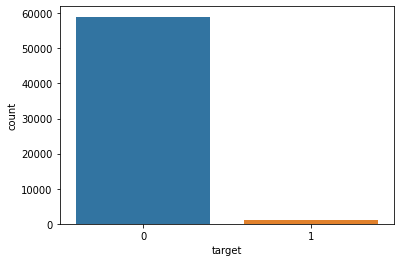

In [ ]:
# WE will check the imbalancement of the data 
Y=train_data
ax=sns.countplot(x="target", data=Y)
plt.show()

- The dataset is highly imbalanced, we can do upsampling, downsampling or stratify splitting to counter it.

- We cannot use accuracy as our performance metric.

###3.3. Concise summary of a data





In [ ]:
#as the dataset contains 'na' instead of null values, we have to replace it with NaN.
#similarly we will replace any possibly NaN value

train_data=train_data.replace('na',np.NaN)
# train_data=train_data.replace('nan',np.NaN)
# train_data=train_data.replace('Nan',np.NaN)
# train_data=train_data.replace('NaN',np.NaN)
# train_data=train_data.replace('naN',np.NaN)
# train_data=train_data.replace('NAN',np.NaN)
# train_data=train_data.replace('NA',np.NaN)

In [ ]:
#Let us see the type of data present in each feature: 
train_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 172 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        60000 non-null  int64 
 1   target                    60000 non-null  int64 
 2   sensor1_measure           60000 non-null  int64 
 3   sensor2_measure           13671 non-null  object
 4   sensor3_measure           56665 non-null  object
 5   sensor4_measure           45139 non-null  object
 6   sensor5_measure           57500 non-null  object
 7   sensor6_measure           57500 non-null  object
 8   sensor7_histogram_bin0    59329 non-null  object
 9   sensor7_histogram_bin1    59329 non-null  object
 10  sensor7_histogram_bin2    59329 non-null  object
 11  sensor7_histogram_bin3    59329 non-null  object
 12  sensor7_histogram_bin4    59329 non-null  object
 13  sensor7_histogram_bin5    59329 non-null  object
 14  sensor7_histogram_bin

- All the numeric data is specified as object as all contains null values, we have to remove the null values as well as convert the object type into float

#####3.3.1. 'Object' type to 'Float' type

In [ ]:
#converting the object type into float so that EDA can be done. 
train_data=train_data.astype(float)

In [ ]:
#Let us see the type of data present in each feature: 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 172 entries, id to sensor107_measure
dtypes: float64(172)
memory usage: 78.7 MB


####Observation : 
- Converting 'object' type to 'float' type enables us to view the required statisitcs of features
- almost all the features contain Null values

###3.4.Descriptive statistics of columns

In [ ]:
train_data.describe(include='all')

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,30000.500000,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,...,13.416652,2.200752e+06,3123.961911,375.147112,2.718638e+03,5.609957e+03,4.707073e+03,3.724824e+04,39.938564,1.861313e+03,2.854177e+04,7.923228e+03,3.374545e+04,2.850785e+04,6958.652722,4.529375e+06,2.037598e+05,8.965500e+04,15403.354670,4.058712e+06,5.938350e+05,7.912085e+05,7.780350e+03,0.215759,1.567750,9.717093e+06,1353.131452,1452.155212,7.334042e+05,7.838746e+05,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,17320.652413,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,3.262607e+06,3.909384e+06,1.422765e+06,2.201524e+05,1.696582e+05,4.185740e+06,1.632778e+05,5.035971e+04,7.583162e+04,5.394658e+05,8.494694e+05,7.790350e+06,6.819518e+06,3.088457e+06,1.262469e+06,5.511653,1.101004e+04,1.196159e+05,1.579952e+04,6598.611557,1482.711621,4

####Observation :

- some features have their IQR range as 0.
- majority of features contain null values
- different b/w mean and median is very large for majority of features

### 3.5.Univariate Analysis

####3.5.1. No. of Null values in each column/feature

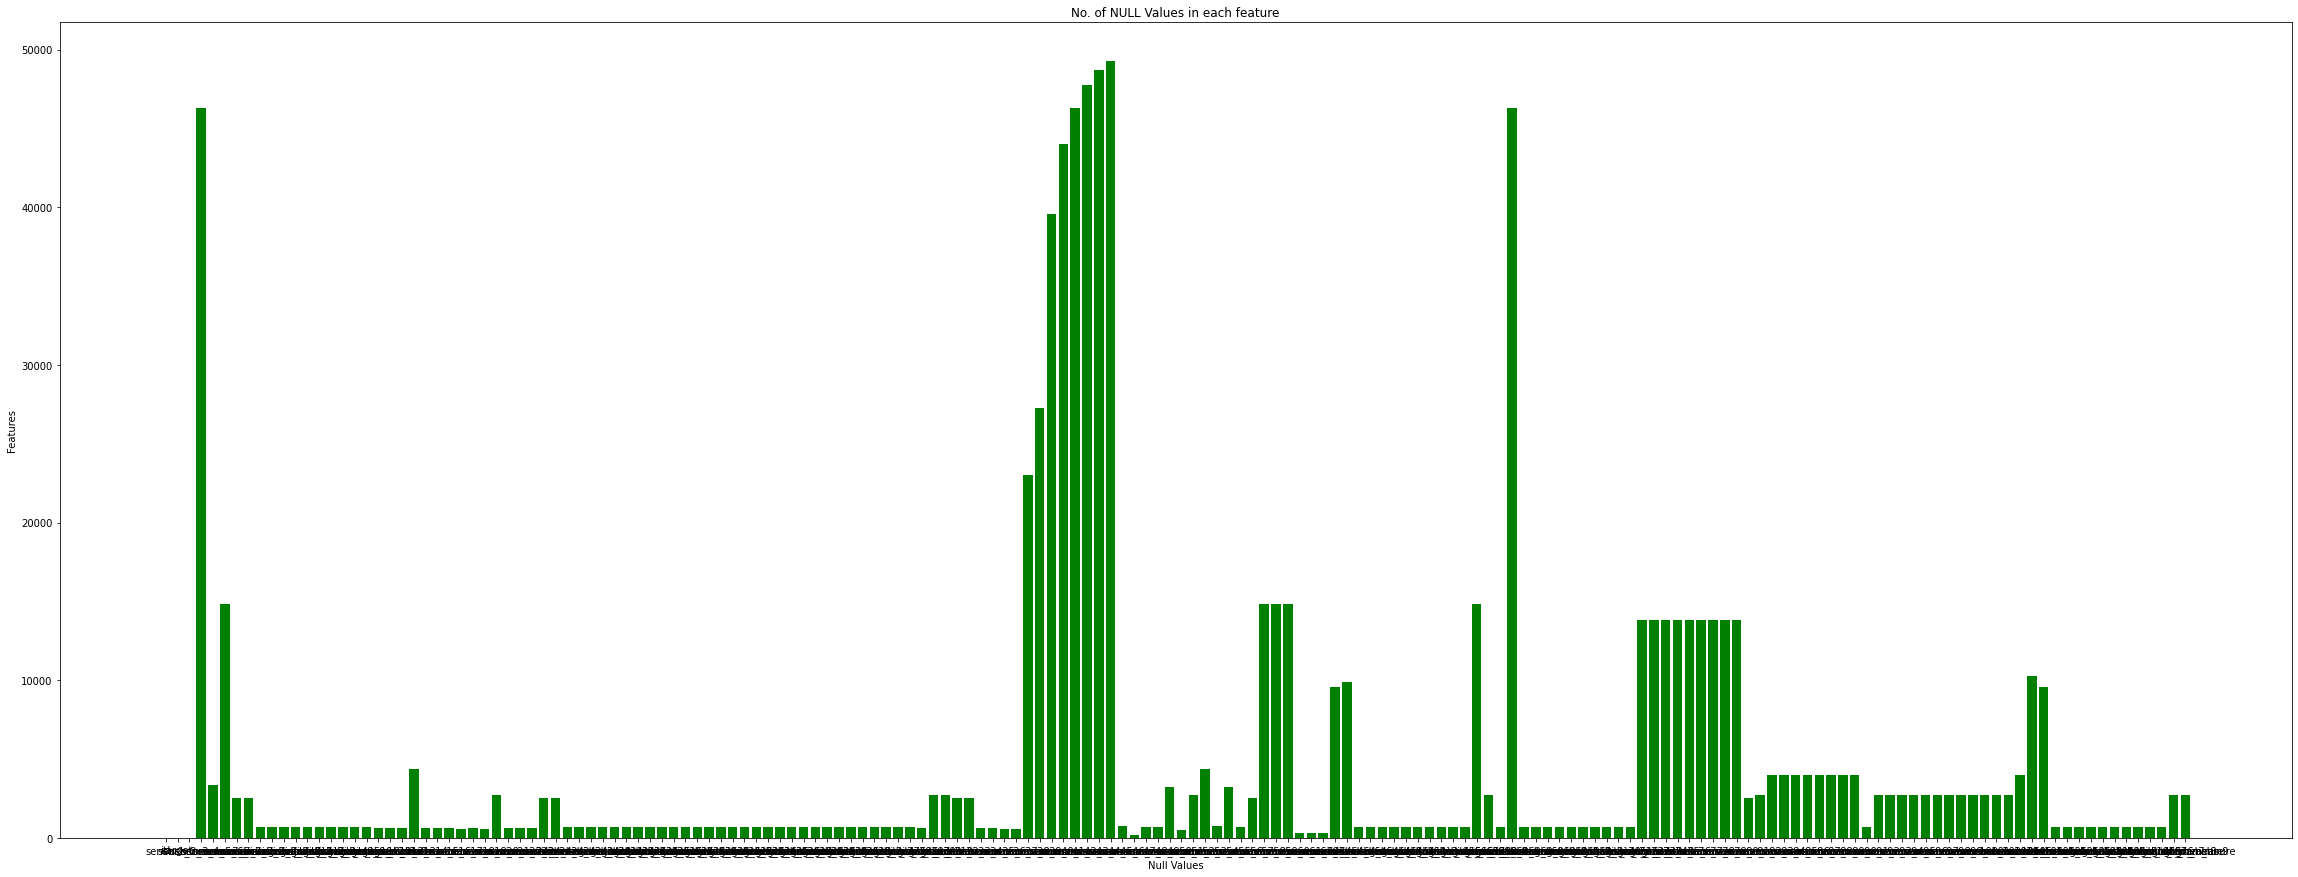

In [ ]:
#to get an intuition, how many null values each coloumn contains 
nan_values=(train_data.isnull().sum()).to_frame()
nan_values.columns=['No. of Null Values']
column_name=list(nan_values.index)
null_count=list(nan_values['No. of Null Values'])

#plotting null value for each column
fig = plt.figure(figsize=(40,15))
plt.bar(column_name,null_count,color='g')
plt.title('No. of NULL Values in each feature')
plt.xlabel('Null Values')
plt.ylabel('Features')
plt.show()

- All features contains some null values.

#####3.5.1.1. No. of features containing large no. of null values

In [ ]:
# counting which features have large no. of null values. 

feat_index=[]
c_90=0
c_80=0
c_70=0

for j,i in enumerate(null_count):
    if i > int(0.95*(len(train_data))):
        c_90 +=1
    if i > int(0.85*(len(train_data))):
        c_80 +=1
    if i > int(0.75*(len(train_data))):
        feat_index.append(j)
        c_70 +=1

print( ' No. of features which have null values for 95 % of the datapoints : ',c_90 )
print( ' No. of features which have null values for 85 % of the datapoints : ',c_80 )
print( ' No. of features which have null values for 75 % of the datapoints : ',c_70 )

 No. of features which have null values for 95 % of the datapoints :  0
 No. of features which have null values for 85 % of the datapoints :  0
 No. of features which have null values for 75 % of the datapoints :  6


- 6 features are there which have more than 75% data points as null values

In [ ]:
#list of features

null_feat=[]
print(' Columns/Features which have null values for 75 % of the datapoints : \n')
for i in feat_index:
    print(train_data.columns[i])
    null_feat.append(train_data.columns[i])

 Columns/Features which have null values for 75 % of the datapoints : 

sensor2_measure
sensor40_measure
sensor41_measure
sensor42_measure
sensor43_measure
sensor68_measure


####Observation : 
- If any feature contains almost 75% of the null values, it will not help in classifying data.

####3.5.2. No. of '0' values in each column/feature



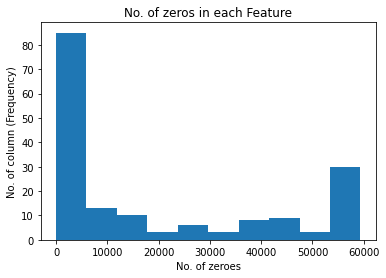

In [ ]:
#appending the no. of zero values for each feature in a list

zero_count=[]
for col in tqdm(train_data.columns):
    if col not in ['id','target']:
        c=0
        for i in train_data[col].values:
            if i==0: c+=1
        zero_count.append(c)


plt.hist(zero_count, bins=10)
plt.title('No. of zeros in each Feature')
plt.xlabel('No. of zeroes')
plt.ylabel('No. of column (Frequency)')
plt.show()

In [ ]:
#features which have more than 95% values as 0's
count=0
cn=[]
for i in zero_count:
    #print(i)
    if i > 0.95*len(train_data):
        count+=1;
        cn.append(zero_count.index(i))

print('Features which have more than 95% values as 0 : \n\n')
for i in cn:
    print(train_data.columns[i+2])
    

Features which have more than 95% values as 0 : 


sensor7_histogram_bin0
sensor7_histogram_bin1
sensor19_measure
sensor21_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin9
sensor25_histogram_bin9
sensor64_histogram_bin0
sensor106_measure


####Observation : 

- many features contains as 0's as thier datapoint values

####3.5.3. Min. and max. of each column/feature

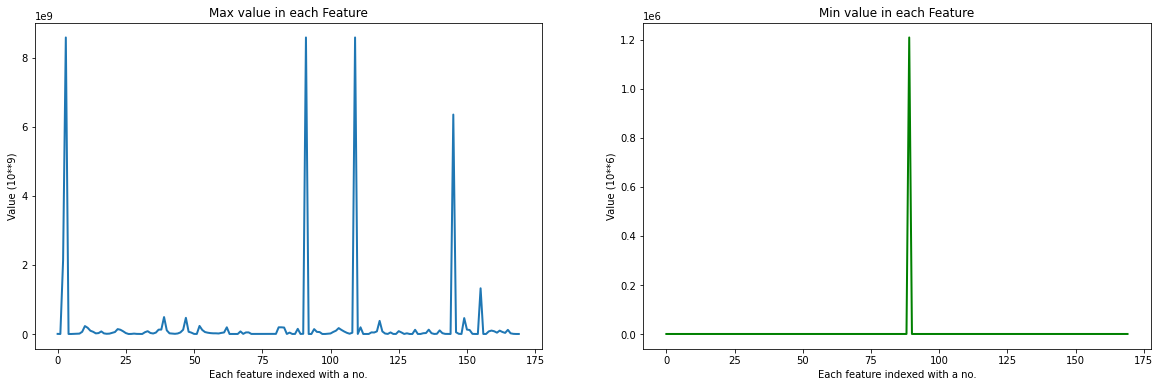

In [ ]:
#appending in a list the max and min. values of each column discarding NaN values
min_=[]
max_=[]
for col in train_data.columns:
    if col not in ['id','target']:
        min_.append(np.nanmin(train_data[col].values)) 
        max_.append(np.nanmax(train_data[col].values))


plt.figure(figsize=(20,6))
#plottting max values
plt.subplot(1,2,1)
plt.plot(range(0,len(max_)),max_,linewidth=2, markersize=12)
plt.title('Max value in each Feature')
plt.xlabel('Each feature indexed with a no.')
plt.ylabel('Value (10**9)')

#plotting min values
plt.subplot(1,2,2)
plt.plot(range(0,len(min_)),min_,'g',linewidth=2, markersize=12)
plt.title('Min value in each Feature')
plt.xlabel('Each feature indexed with a no.')
plt.ylabel('Value (10**6)')

plt.show()

####Observation : 
- min value of all features is 0 except 1.
- max value is very much high and varies among features.
- scaling has to be done.

#####3.5.3.1 Feature containing majority of their datapoints same 

In [ ]:
red_feat=[]
perc=[]
print('Features which contain any value(including 0) for more than 95% of thier datapoints: \n')
for col in (train_data.columns):
    if col not in ['id','target']:
        fv=0
        fv=list(train_data[col].value_counts())[0]
        p=(fv/60000)*100
        perc.append(p)
        if p>95.00:
            print(col)
            red_feat.append(col)


Features which contain any value(including 0) for more than 95% of thier datapoints: 

sensor7_histogram_bin0
sensor7_histogram_bin1
sensor19_measure
sensor21_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin9
sensor25_histogram_bin9
sensor54_measure
sensor64_histogram_bin0
sensor106_measure


####Observation : 
- sensor54_measure contains a value other than 0, which is same for almost all the datapoints.

####3.5.4. BOX-plot

- These columns are selected on the basis of no. of NaN values and Zero values they contain

In [ ]:
#selecting 5 features
check=['a','sensor13_measure','sensor19_measure','sensor39_measure','sensor1_measure','sensor106_measure']

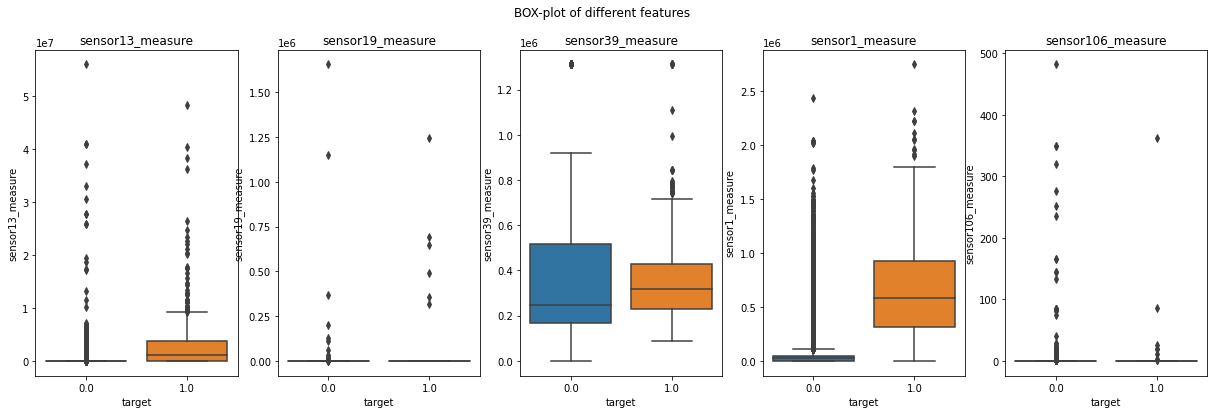

In [ ]:
fig=plt.figure(figsize=(21,6))
columns = 5
rows = 1
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    ax = sns.boxplot(x="target", y=check[i], data=train_data)
    plt.title(check[i]) 
plt.suptitle('BOX-plot of different features')
plt.show()

####Observations: 
- sensor13_measure is able to classify class 1, and as 50 to 70th percentile points are able to distinguish it.
- 'sensor19_measure' , from box plot's view its not distingusihing much.
- 'sensor39_measure', class 1 points lie in the same range as class 0 points.
- 'sensor1_measure' , IQR range of class 0 points are distinguishable from IQR range of class 1 points. But many points of class 0 are considered as oultiers.
- 'sensor106_measure' , class 0 has some ouliers and  from box plot's view its not distingusihable much.

####3.5.5. PDF of features

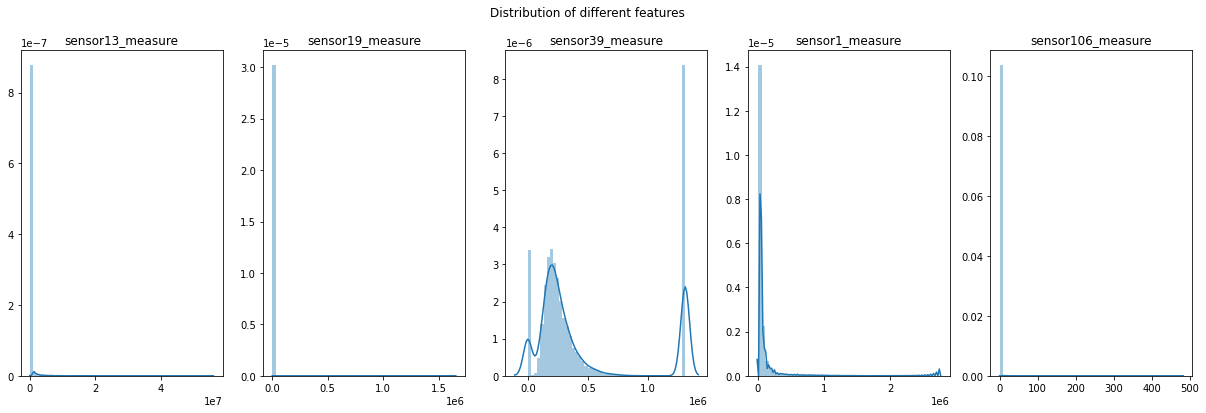

In [ ]:
#plotting the distributions
fig=plt.figure(figsize=(21,6))
columns = 5
rows = 1
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    ax =  sns.distplot(train_data[check[i]].values,kde=True) 
    plt.title(check[i]) 
plt.suptitle('Distribution of different features')
plt.show()

####Observations: 
- almost all the distributions are right skewed.
- Majority of them contains 0 values.

####3.5.4. Measure columns and histogram_bin columns:
- measure columns - These columns are a single measurement for the sensor.
- histogram bin columns - These columns are set of 10 columns that are different bins of a sensor that show its distribution over time.

( Exploratoratry analysis of the two types of columns to get some intra-columns and inter-columns insoghts)

In [ ]:
#seperating histogram features from train data
hist=[]
for i in train_data.columns:
    if 'histogram' in i:
        #print(i)
        hist.append(i)

hist.insert(0,'a')

#creating a dict.
sep_hist={}
for i in range(1,len(hist),10):
    a=[]
    for j in range(i,i+10):
        a.append(hist[j])
    sep_hist[a[0]]=a

#####3.5.4.1. Count of diff. bins of histogram features.

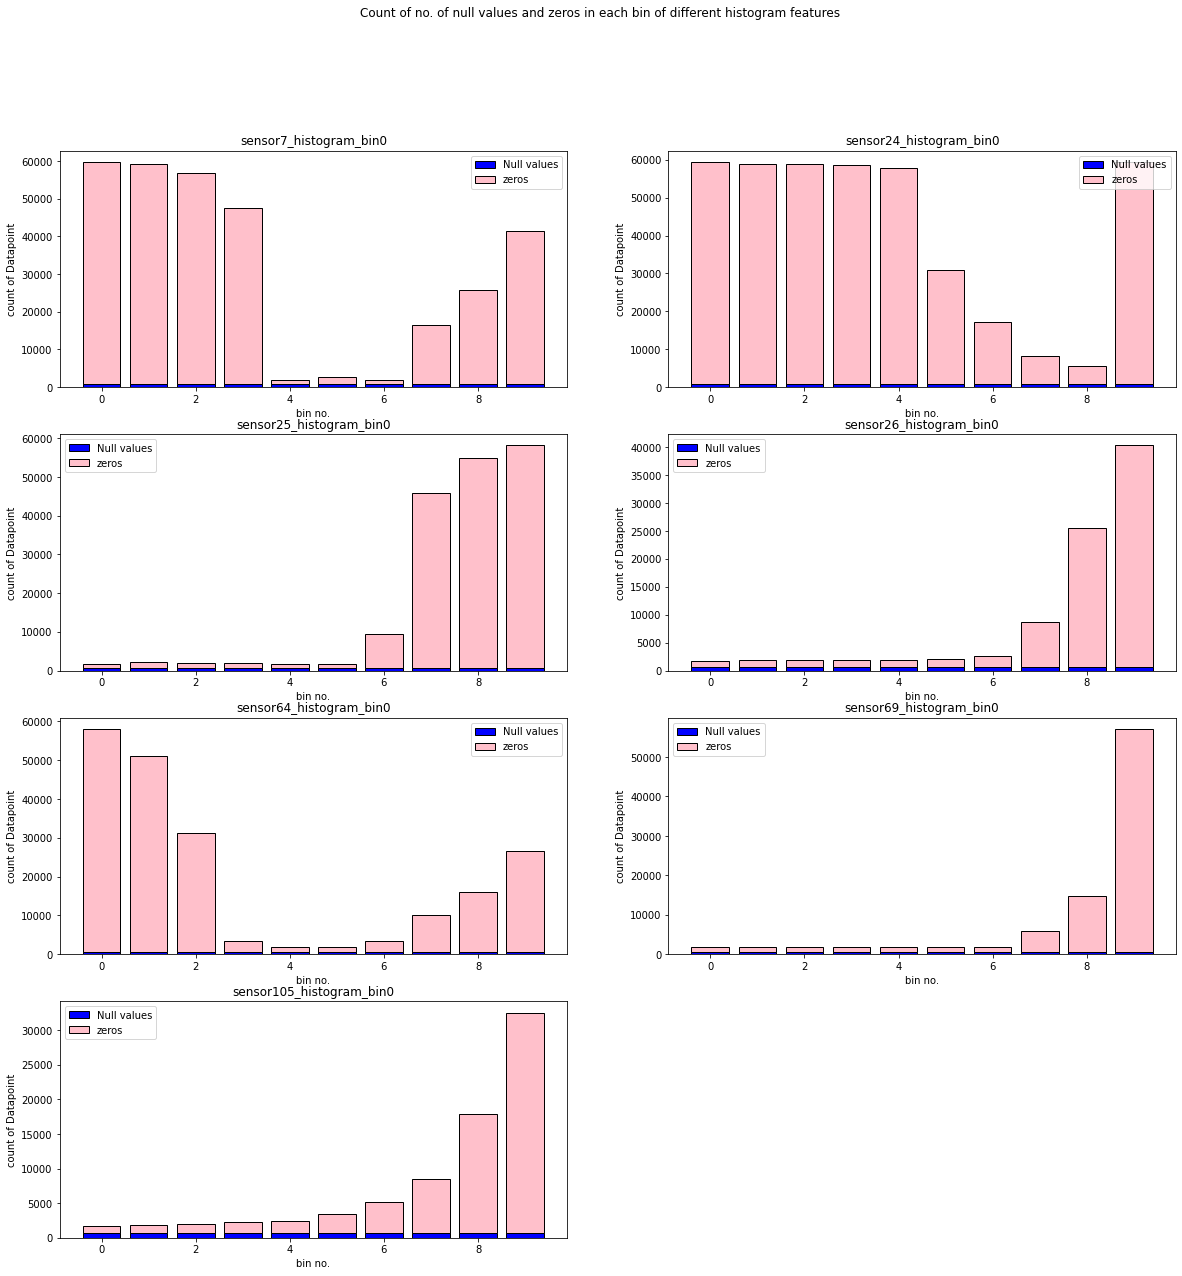

In [ ]:
hist_keys=list(sep_hist.keys())
fig=plt.figure(figsize=(20,20))
g=['Null values','zeros']
rows=4
columns=2
for i in tqdm(sep_hist.keys()):
    na=[]
    z=[]
    c=0
    for j in sep_hist[i]:
        na.append(train_data[j].isna().sum())
        s=dict(train_data[j].value_counts())
        z.append(s[0])
        c+=1
    c=np.arange(c)
    index=hist_keys.index(i)
    fig.add_subplot(rows,columns,index+1)
    plt.bar(c,na,color='blue',edgecolor='black')
    plt.bar(c,z,color='pink',edgecolor='black',bottom=na)
    plt.xlabel('bin no.')
    plt.ylabel('count of Datapoint')
    plt.title(i)
    plt.legend(g)
plt.suptitle('Count of no. of null values and zeros in each bin of different histogram features')
plt.show()


####Observations:
- Every bin of every histogram feature contains approx 670 null values.
- most of sensor_24 bins contains 0. 
- 2-3 bin of every histogram contains high amt. of zero.
- We can make use of average of all histogram bins to make a new feature. 

#####3.5.4.2. PDF of diff. bins of histogram features.

					 Distribution of different histogram features 
					  The interger on top denotes sensor number 
					   bin no. from 0-9 (left to right)



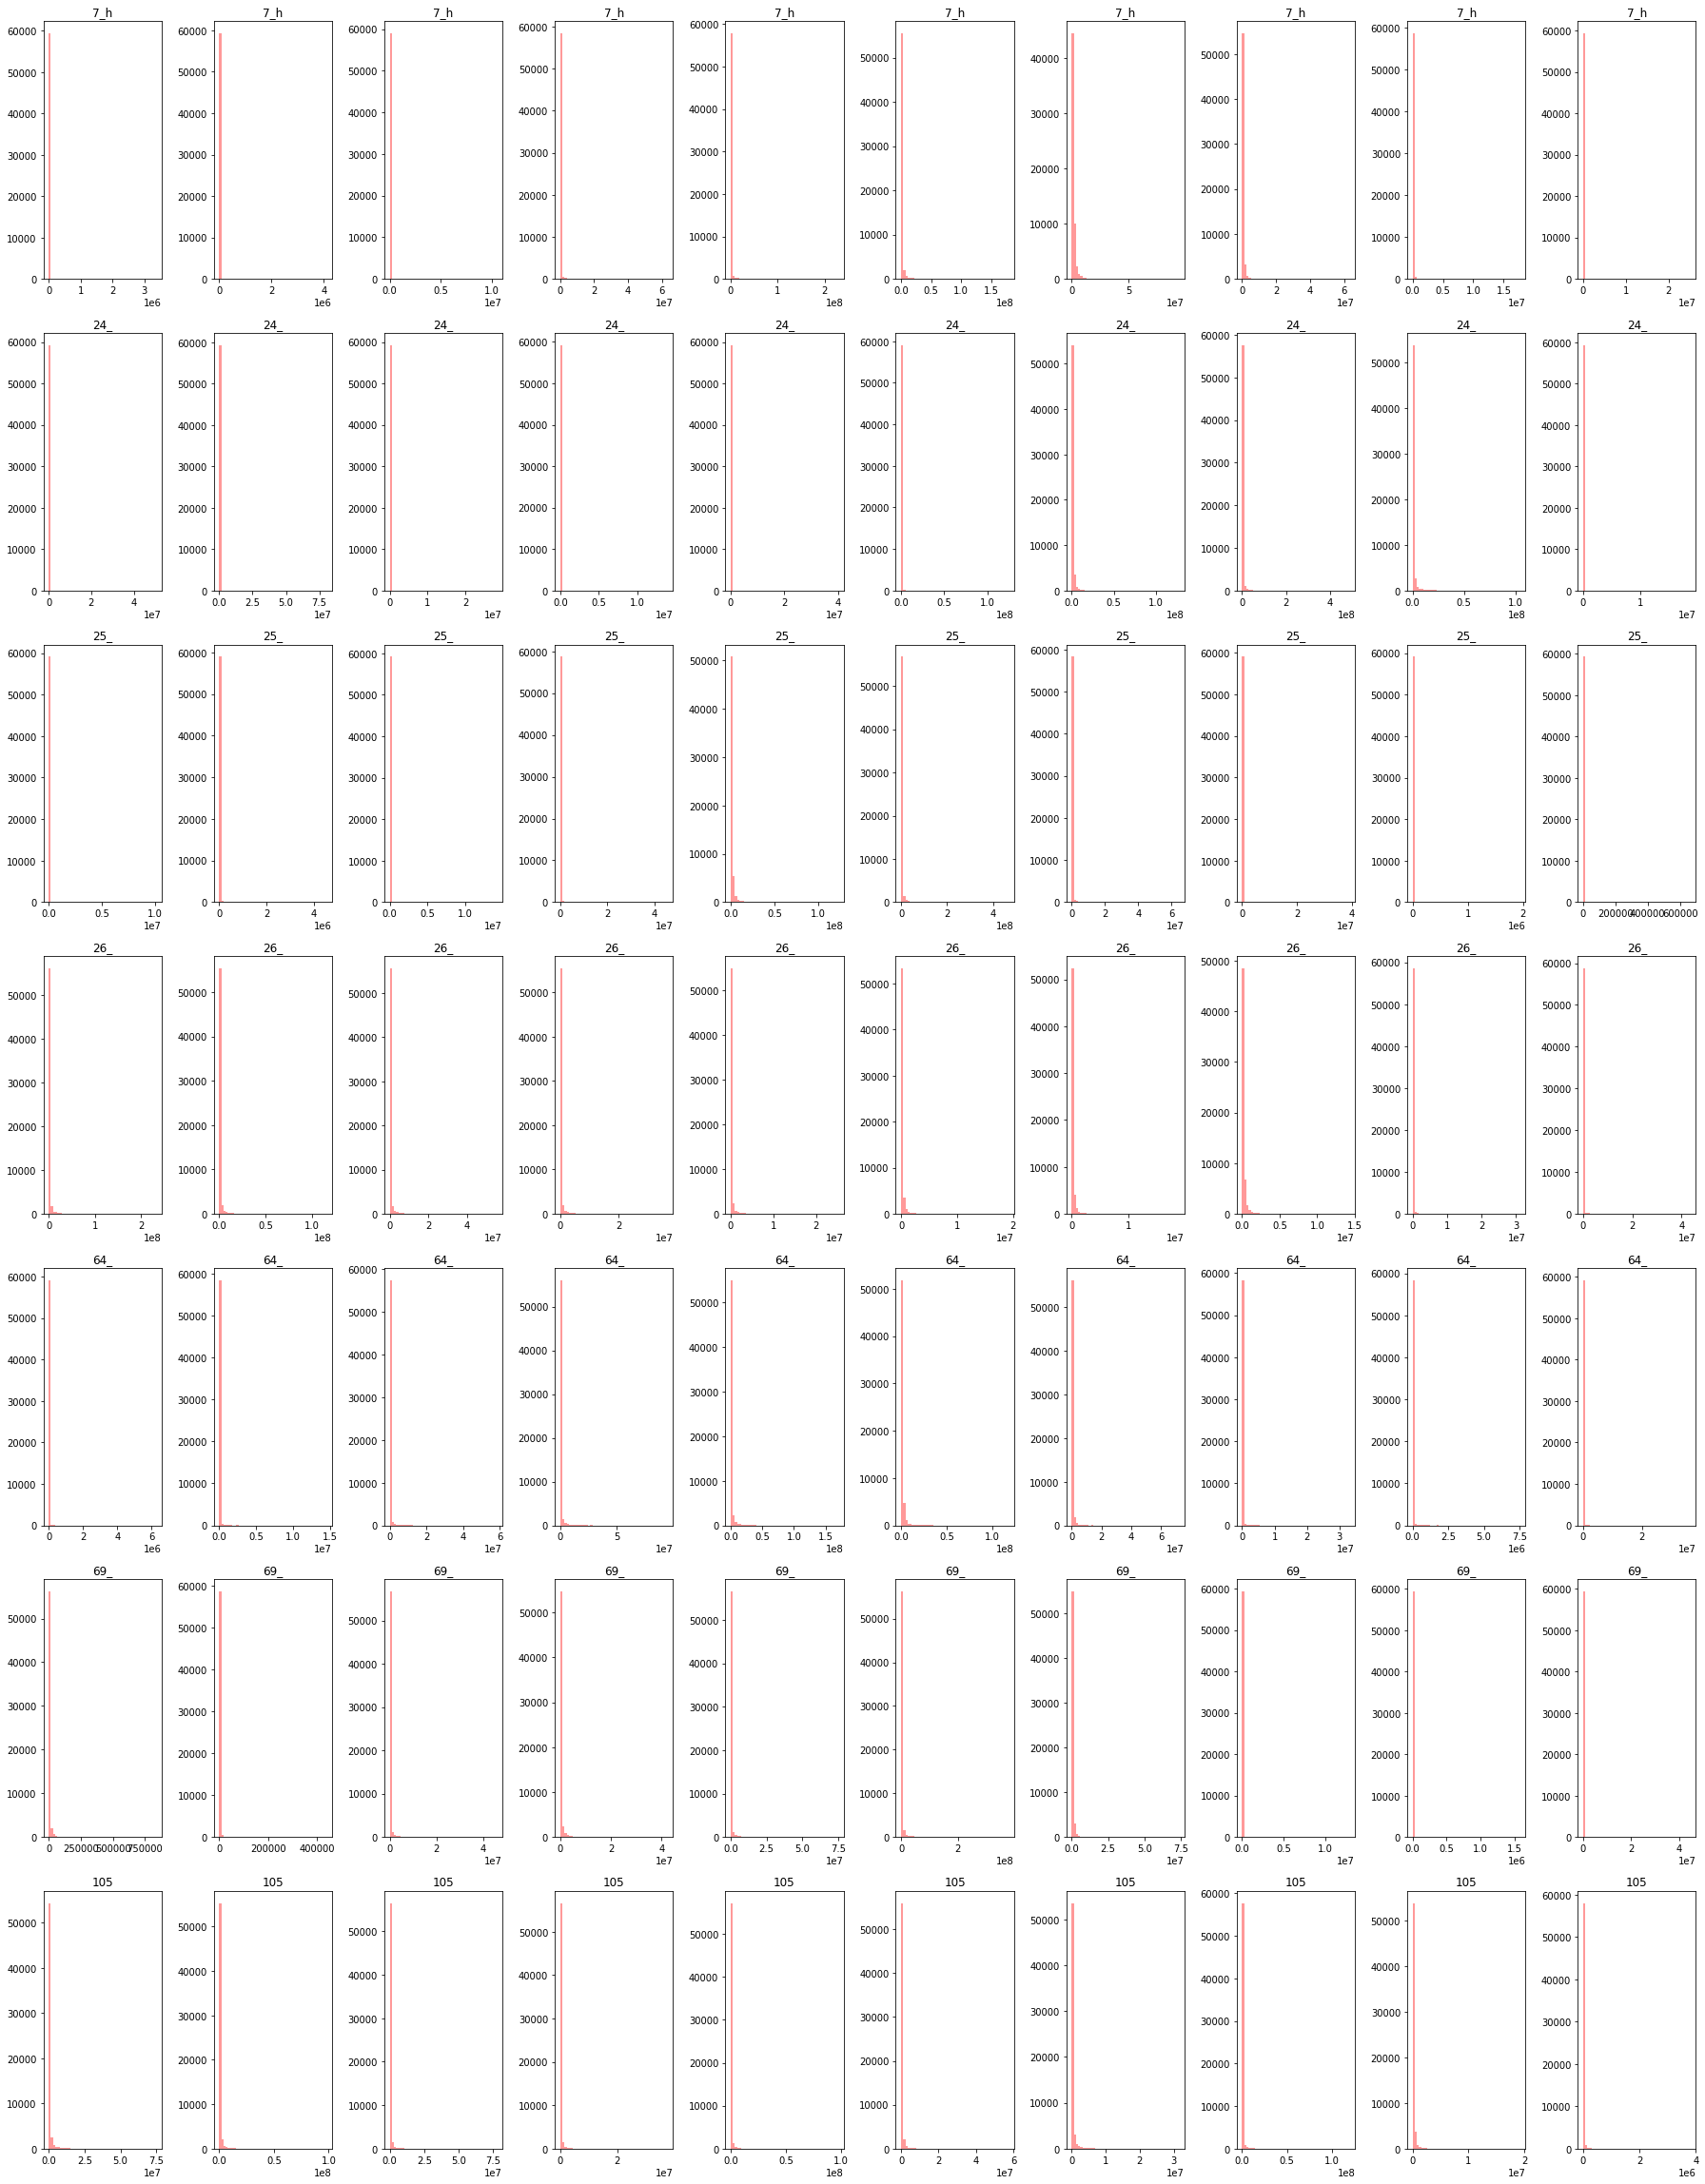

In [ ]:
#plotting the distributions
fig=plt.figure(figsize=(25,32))
columns = 10
rows = 7
print('\t\t\t\t\t Distribution of different histogram features \n\t\t\t\t\t  The interger on top denotes sensor number \n\t\t\t\t\t   bin no. from 0-9 (left to right)\n')
for i in range(1, 71):
    fig.add_subplot(rows, columns, i)
    ax =  sns.distplot(train_data[hist[i]].values,kde=False,color='r') 
    plt.title(hist[i][6:9]) 
#plt.suptitle('Distribution of different histogram features \n The interger on top denotes sensor number \n bin no. from 0-9 (left to right)')
plt.tight_layout()
plt.show()

####Observations: 
- All bins are highly skewed as the values in there are majority 0 or small values and the max value is very large.

#####3.5.4.3. Box Plot of diff. bins of histogram features.

					 Distribution of different histogram features 
					  The interger on top denotes sensor number 
					   bin no. from 0-9 (left to right)



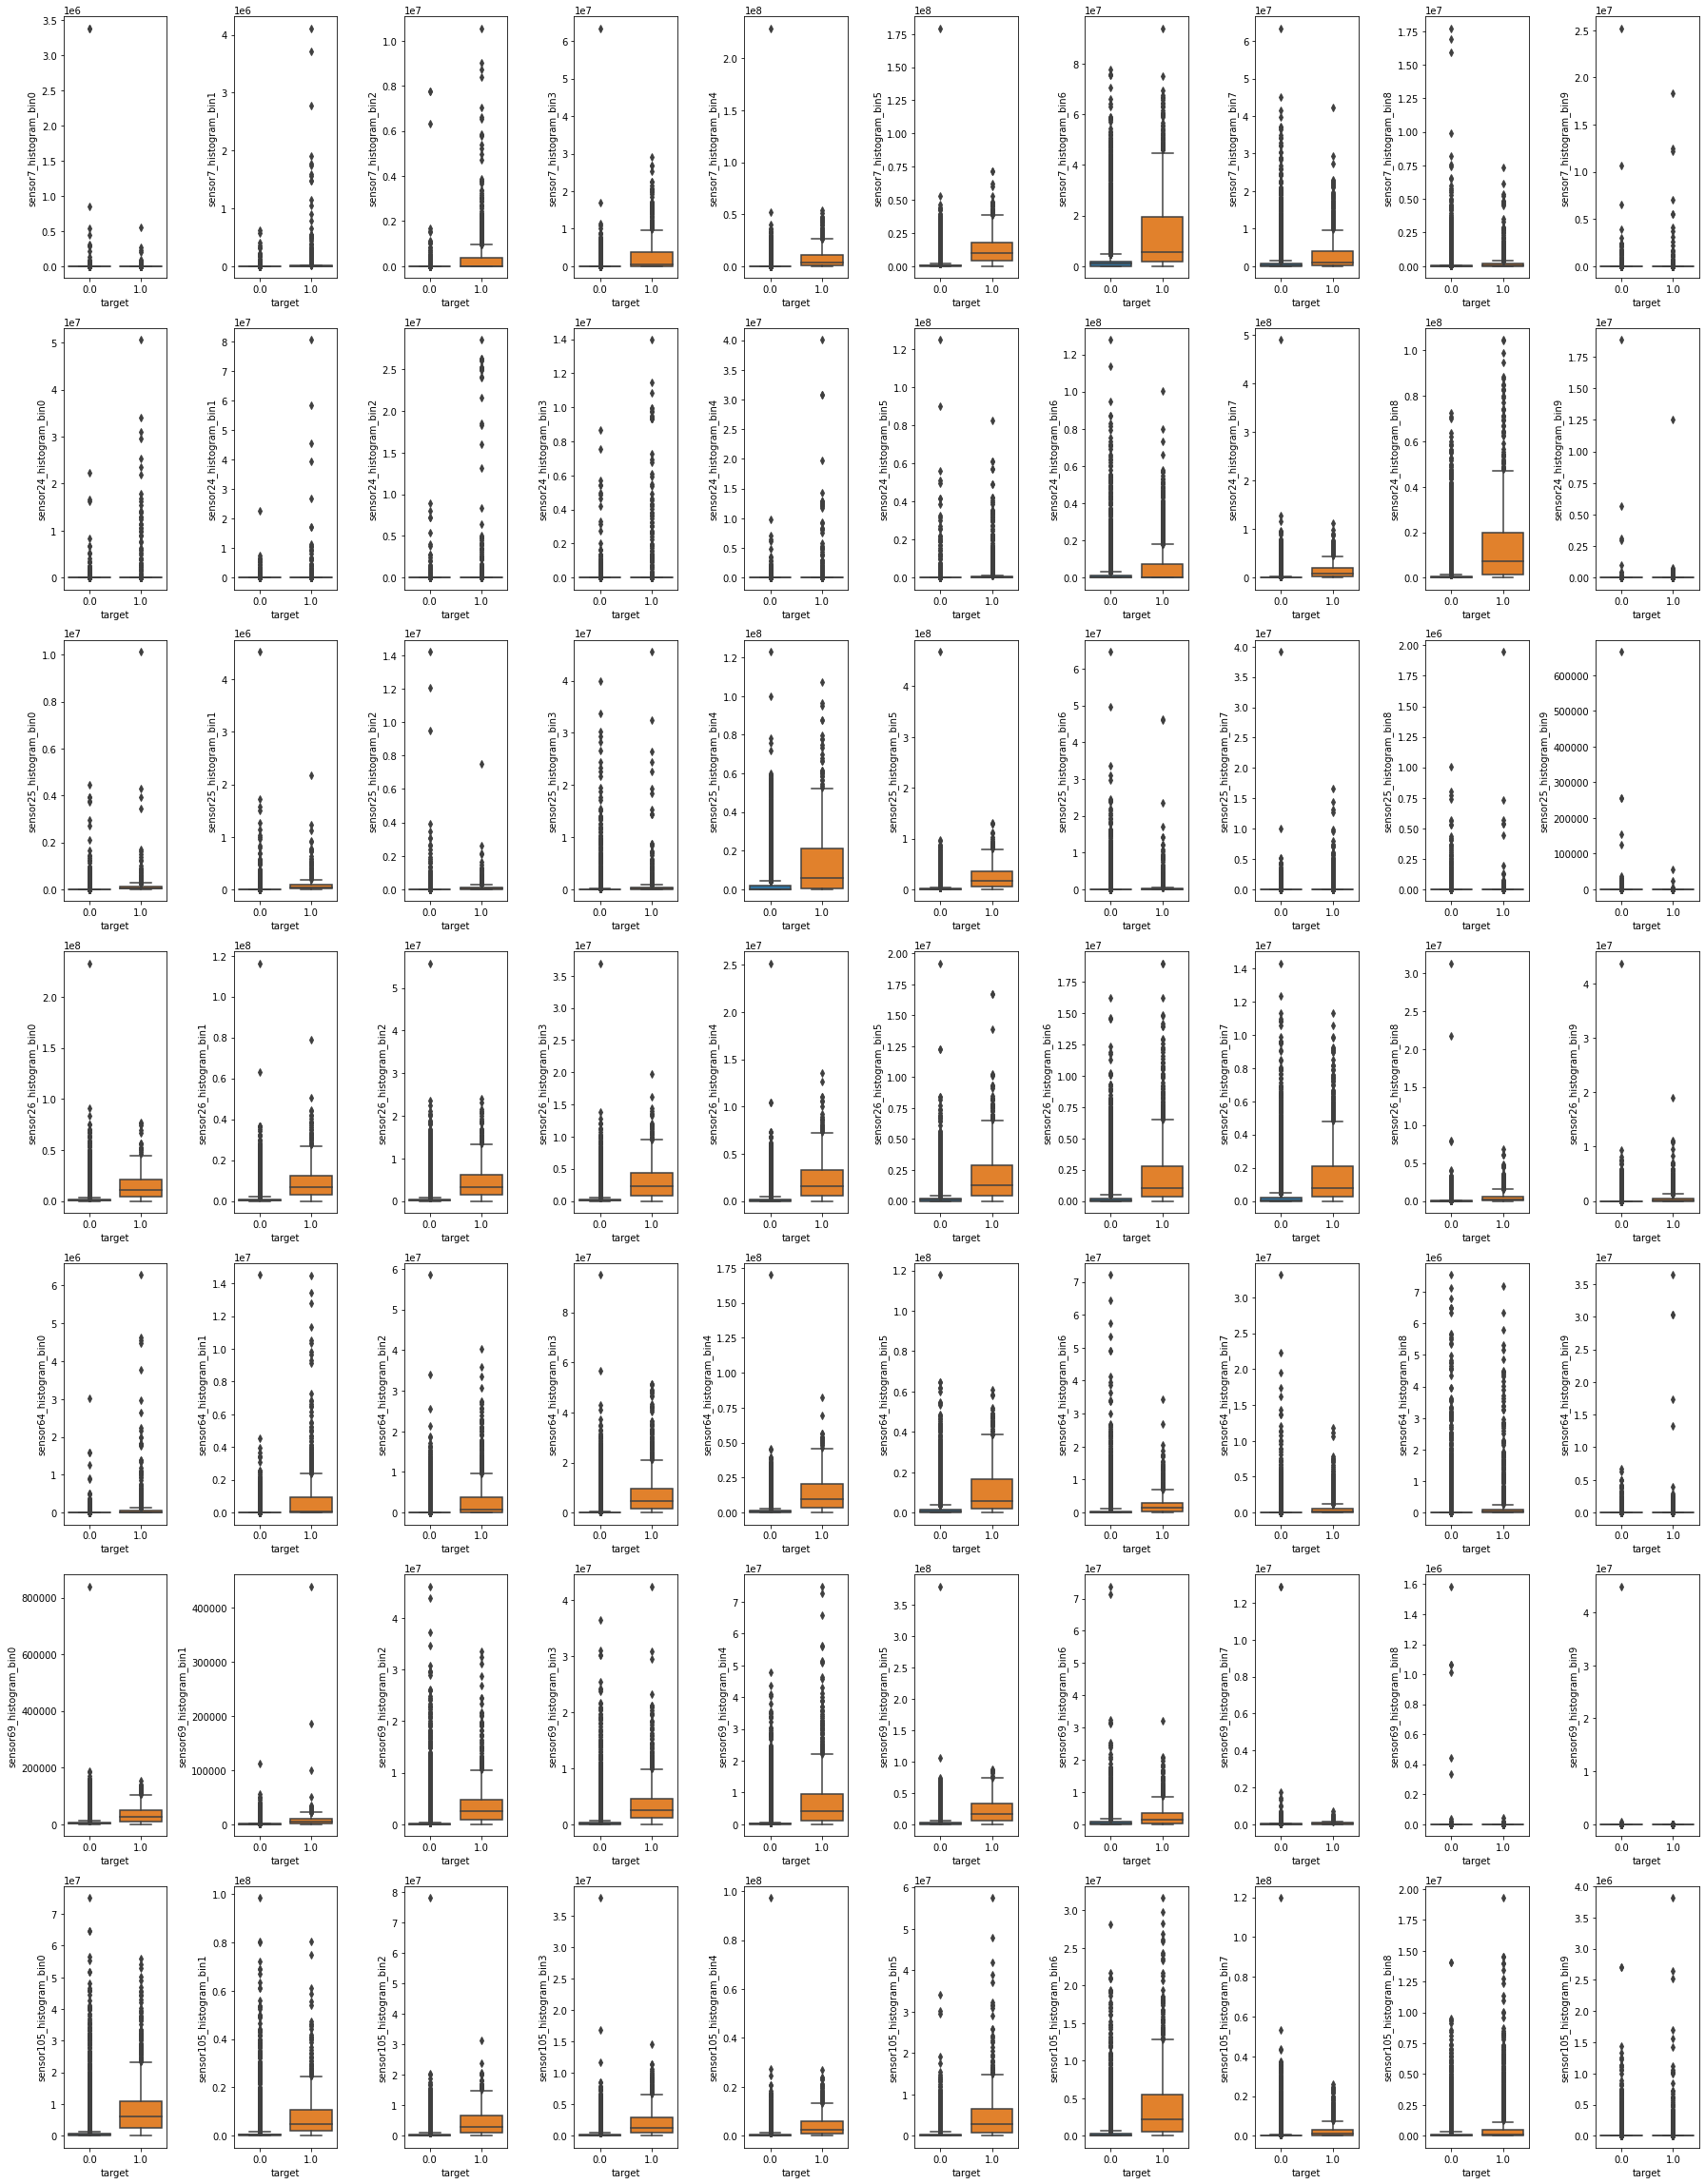

In [ ]:
#plotting the distributions
fig=plt.figure(figsize=(25,32))
columns = 10
rows = 7
print('\t\t\t\t\t Distribution of different histogram features \n\t\t\t\t\t  The interger on top denotes sensor number \n\t\t\t\t\t   bin no. from 0-9 (left to right)\n')
for i in range(1, 71):
    fig.add_subplot(rows, columns, i)
    ax = sns.boxplot(x="target", y=hist[i], data=train_data)
    #plt.title(hist[i][6:9]) 
#plt.suptitle('Distribution of different histogram features \n The interger on top denotes sensor number \n bin no. from 0-9 (left to right)')
plt.tight_layout()
plt.show()

####Observations:
- Univariate analysis of diff. bin of every histogram feature is not very much diff. from normal sensor feature.
- Most of the bins of sensor_24 is highly consists of 0 values.

## 3.6. Multivariate Analysis

###3.6.1. Collinearity

- Let us check the collinearity between diff. features and we will remove those features which are highly correlated to each other and also those features which are not at all related to dependent variable

In [ ]:
c=train_data.iloc[:,2:].corr()
c.head()

,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
sensor1_measure,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,0.607674,0.781365,0.673317,0.481600,0.213784,0.072331,0.908103,0.141642,0.064064,0.038142,0.500743,0.503724,0.915273,0.920302,0.822415,0.779180,0.224119,0.068093,0.070577,0.043807,0.180286,0.277310,0.057891,0.029108,0.099810,0.112312,0.164061,0.269891,0.476394,0.648050,...,0.064388,0.765513,0.620168,0.359027,0.055306,0.087932,0.016252,0.215848,-0.002579,0.055171,0.000341,-0.000372,0.779681,0.683726,0.685514,0.271417,0.539790,0.815224,0.809616,0.445563,0.504998,0.560815,0.389472,0.023108,0.026794,0.586496,0.671160,0.687288,0.588797,0.550905,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
sensor2_measure,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,0.068100,0.060405,0.064283,0.071279,0.070505,0.044106,0.018805,0.086283,0.001311,-0.001209,0.005054,0.049683,0.052448,0.086816,0.087491,0.099696,0.077820,0.092657,-0.002073,0.014219,0.008116,0.064589,0.071377,0.013840,NaN,NaN,0.002831,0.010830,0.016211,0.030032,0.058799,...,0.008079,0.049181,0.052978,0.095044,0.001591,0.019952,0.002832,0.063948,0.002255,0.003169,-0.001372,-0.000250,0.082234,0.066560,0.090657,0.031040,0.071395,0.084098,0.086332,0.082268,0.084656,0.080483,0.092794,0.018754,0.111269,0.076814,0.077220,0.098730,0.072193,0.058799,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
sensor3_measure,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,-0.049296,-0.028268,-0.000992,0.022132,0.010524,-0.001563,-0.041149,0.016004,-0.006257,-0.001693,-0.047264,-0.047820,-0.030501,-0.033029,-0.038303,-0.016284,-0.037780,-0.003557,-0.002716,-0.004893,0.020949,-0.005053,-0.008654,-0.006187,-0.009400,-0.012304,-0.010340,-0.003300,0.007161,-0.026618,...,0.031170,0.018570,-0.035759,-0.016119,-0.004494,-0.009789,-0.003384,-0.017529,-0.002933,-0.001851,-0.005497,-0.006213,-0.027791,0.010376,0.148887,-0.033120,-0.036160,-0.059557,-0.043368,0.178596,0.118748,-0.027873,-0.028745,0.009278,0.008480,-0.046725,-0.044672,-0.022948,-0.022712,-0.020911,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
sensor4_measure,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,-0.000687,-0.001498,-0.002666,-0.001856,-0.00

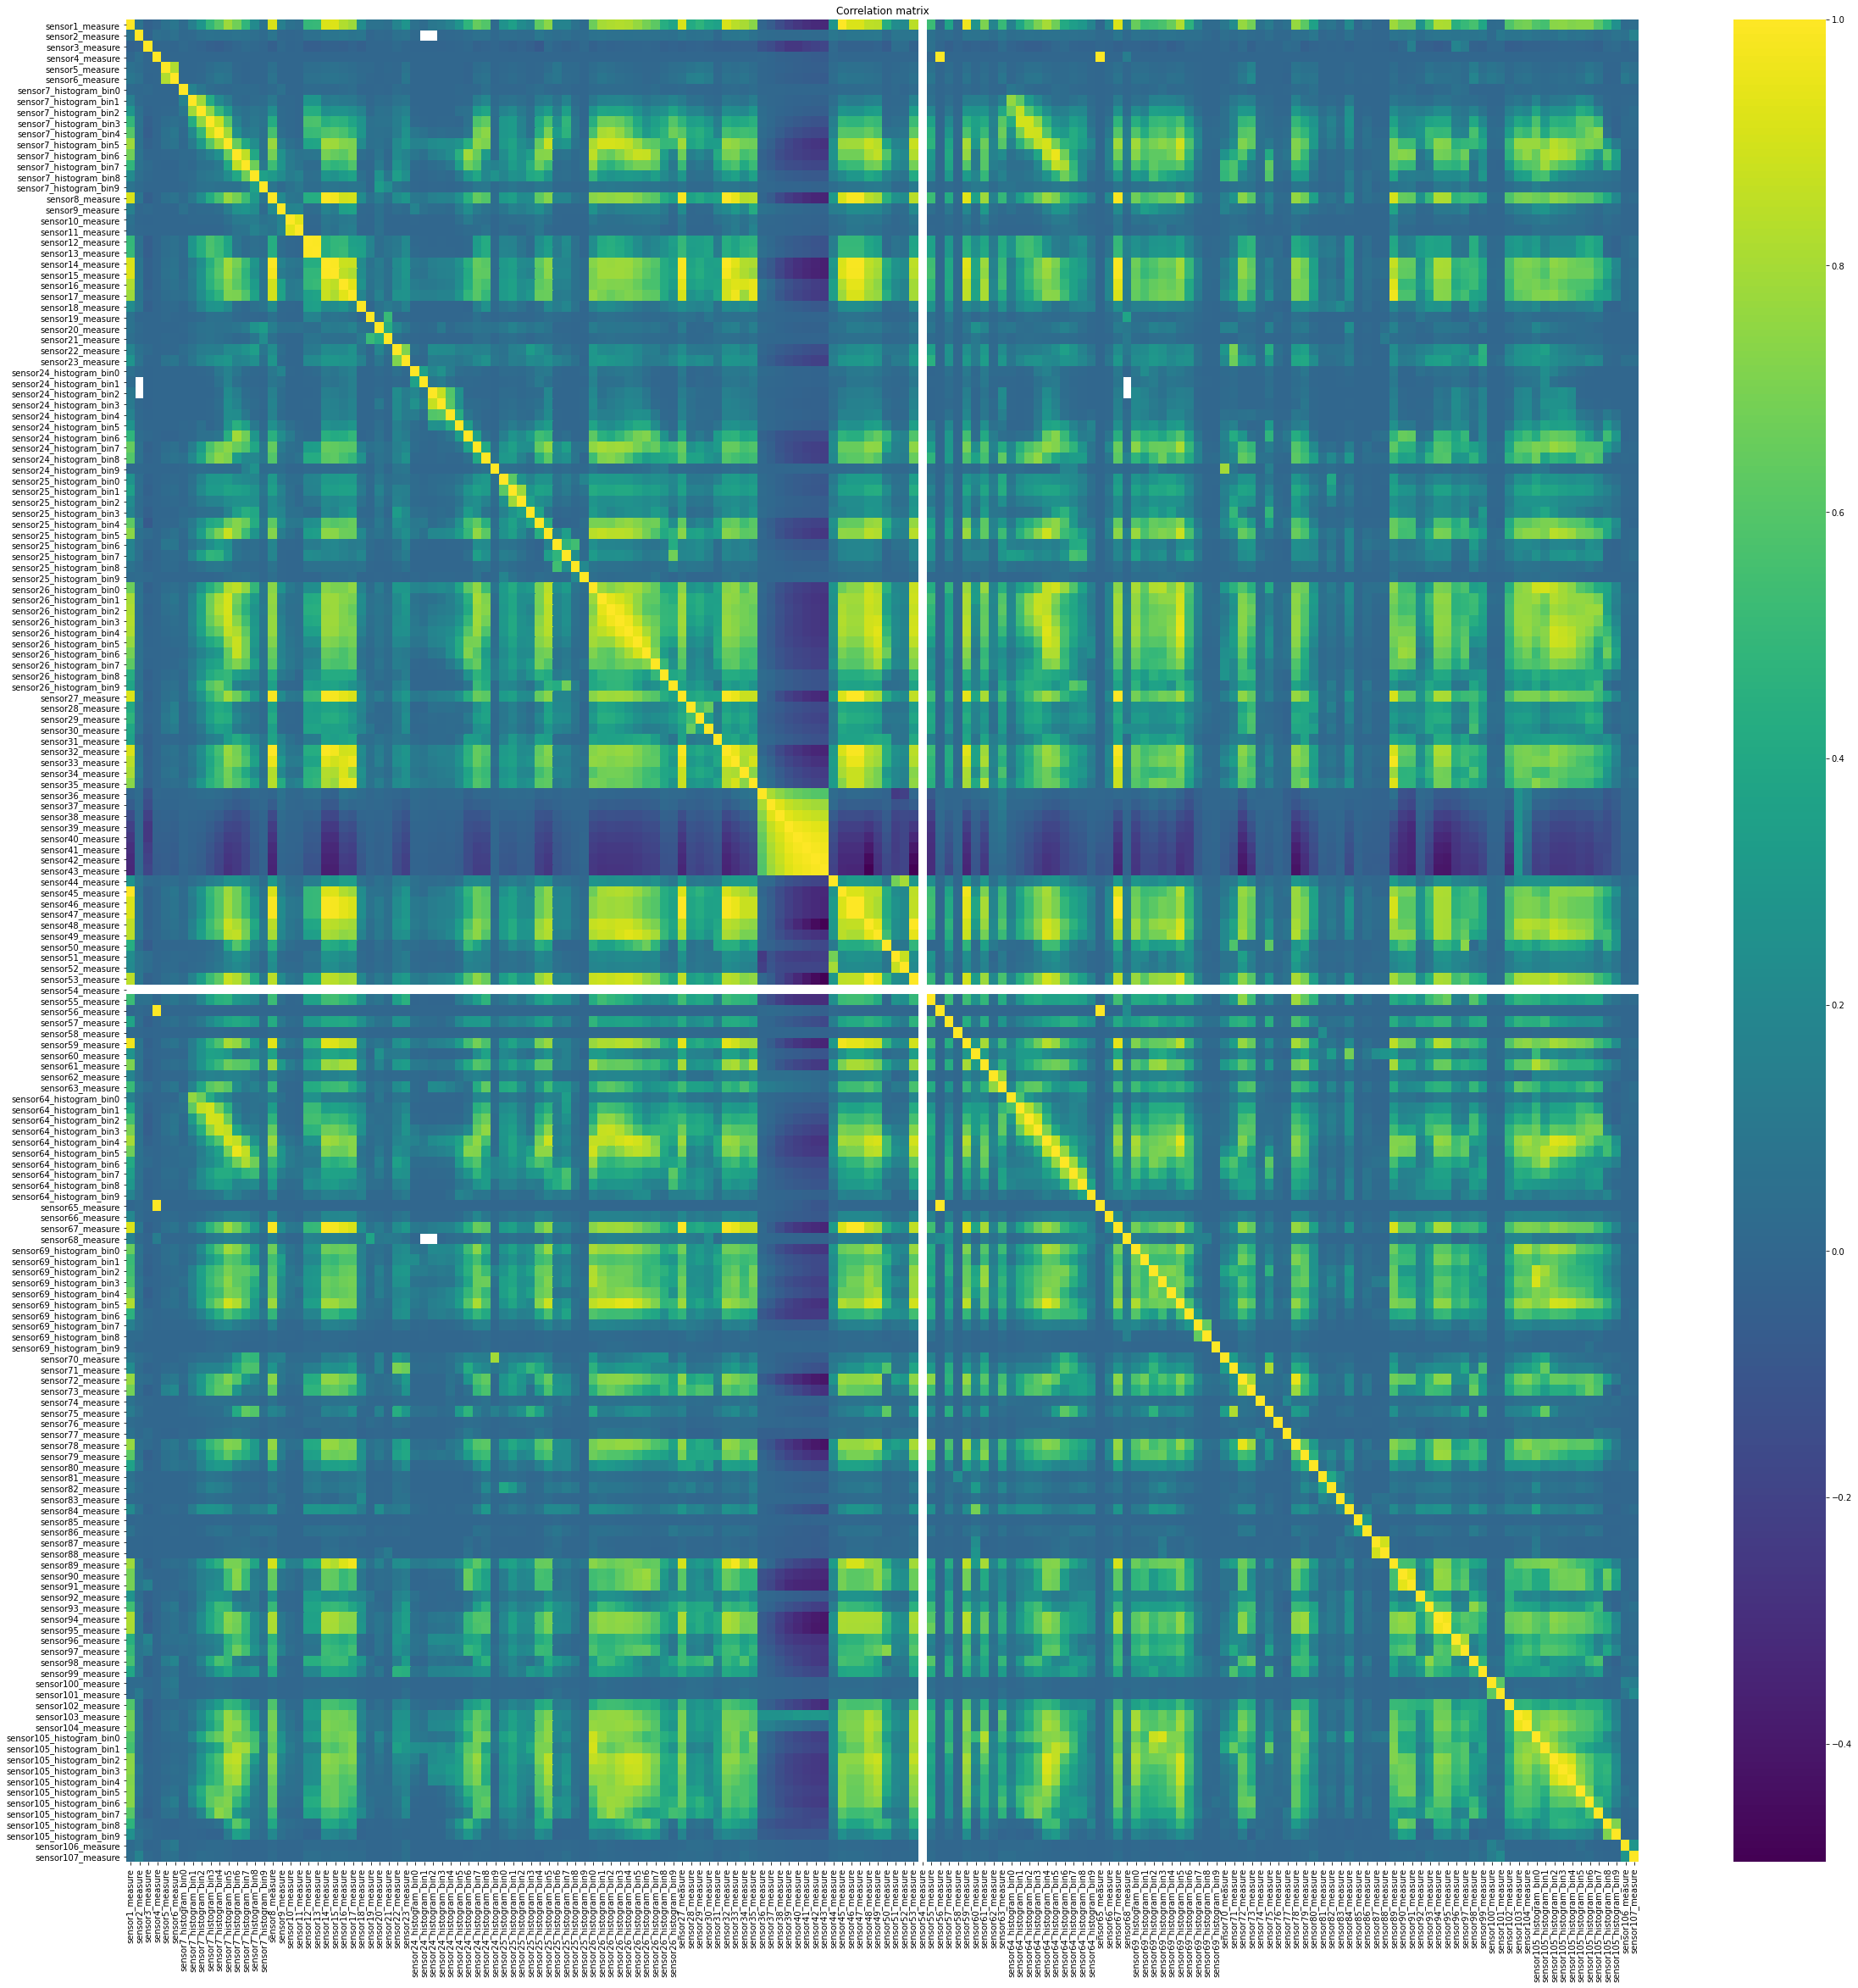

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(c, annot=False, cmap = 'viridis')
plt.title('Correlation matrix')
plt.show()

####Observation : 

- From just a glance we can see that there are various features which are highly colinear to each other.
- We can see a white line for sensor54_measure.

In [ ]:
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = c.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop_col = [column for column in upper.columns if any(upper[column] > 0.80)]

In [ ]:
print('List of features who are very much collinear with other columns : \n\n', to_drop_col) 

List of features who are very much collinear with other columns : 

 ['sensor6_measure', 'sensor7_histogram_bin4', 'sensor7_histogram_bin7', 'sensor8_measure', 'sensor11_measure', 'sensor13_measure', 'sensor14_measure', 'sensor15_measure', 'sensor16_measure', 'sensor17_measure', 'sensor24_histogram_bin3', 'sensor25_histogram_bin5', 'sensor26_histogram_bin0', 'sensor26_histogram_bin1', 'sensor26_histogram_bin2', 'sensor26_histogram_bin3', 'sensor26_histogram_bin4', 'sensor26_histogram_bin5', 'sensor26_histogram_bin6', 'sensor27_measure', 'sensor32_measure', 'sensor33_measure', 'sensor34_measure', 'sensor35_measure', 'sensor37_measure', 'sensor38_measure', 'sensor39_measure', 'sensor40_measure', 'sensor41_measure', 'sensor42_measure', 'sensor43_measure', 'sensor45_measure', 'sensor46_measure', 'sensor47_measure', 'sensor48_measure', 'sensor49_measure', 'sensor52_measure', 'sensor53_measure', 'sensor56_measure', 'sensor59_measure', 'sensor61_measure', 'sensor64_histogram_bin1', 'sensor64_

####3.6.2.Intra-histogram bin correlation matrix:
- to check whether bins of histogram features are related. 


					 Correlation matrix of Different histogram features:



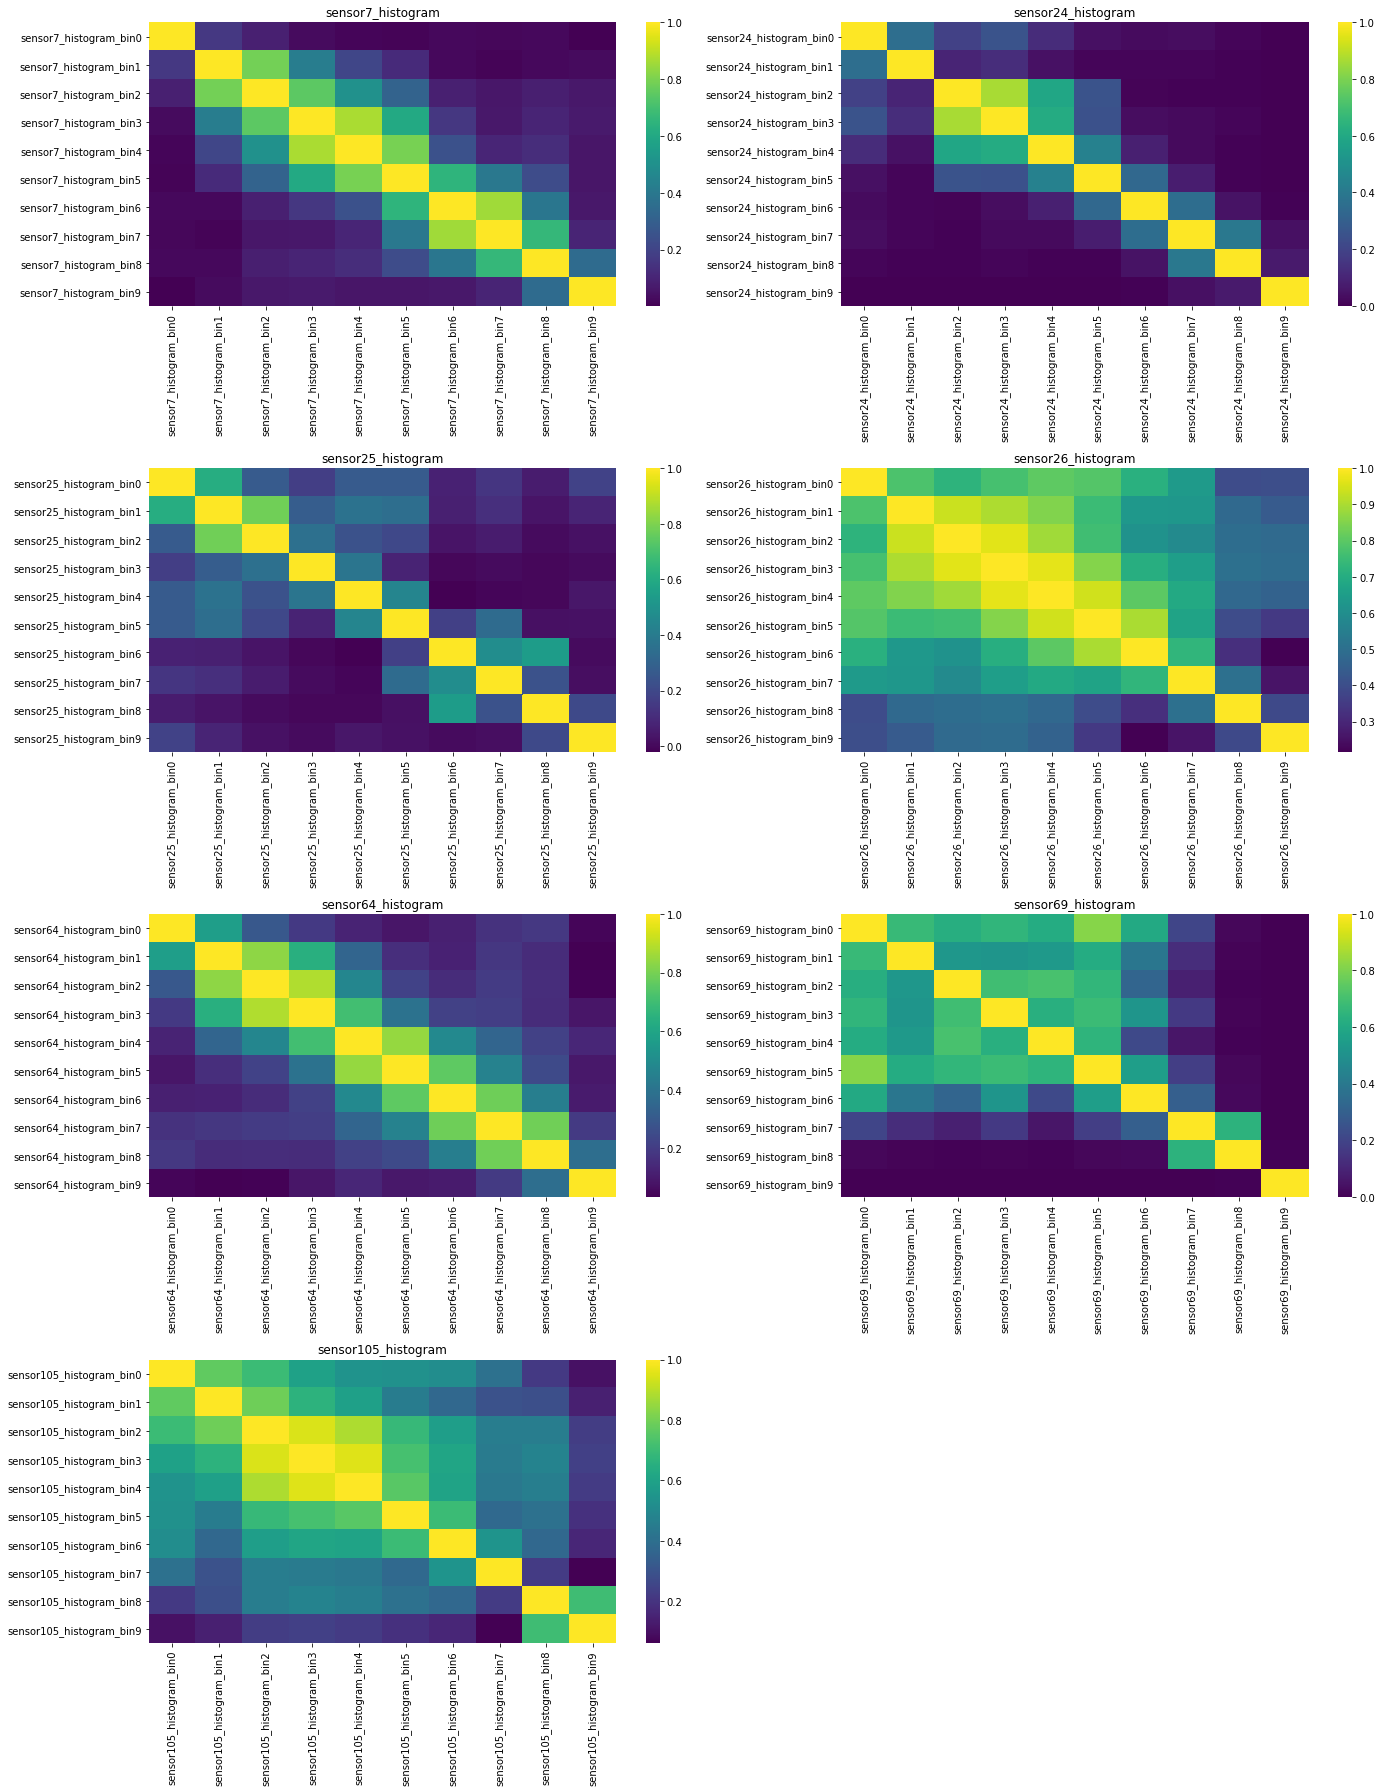

In [ ]:
#plotting the distributions
fig=plt.figure(figsize=(20,25))
columns = 2
rows = 4
print('\t\t\t\t\t Correlation matrix of Different histogram features:\n')
for i in (range(1, 8)):
    fig.add_subplot(rows, columns, i)
    h=list(sep_hist.values())[i-1]
    cor=train_data[h].corr()
    ax = sns.heatmap(cor, annot=False, cmap = 'viridis')
    plt.title(h[0][:-5]) 
#plt.suptitle('Correlation matrix of Different histogram features:')
plt.tight_layout()
plt.show()

####Observations: 
- nth Bin of different histogram features is very much dependent on (n-1)th feature. This shows that it is  time-distributed.

####3.6.3.Inter-histogram bin correlation matrix:
- To check the whether particular bin of each histogram feature possesses any collinearity.

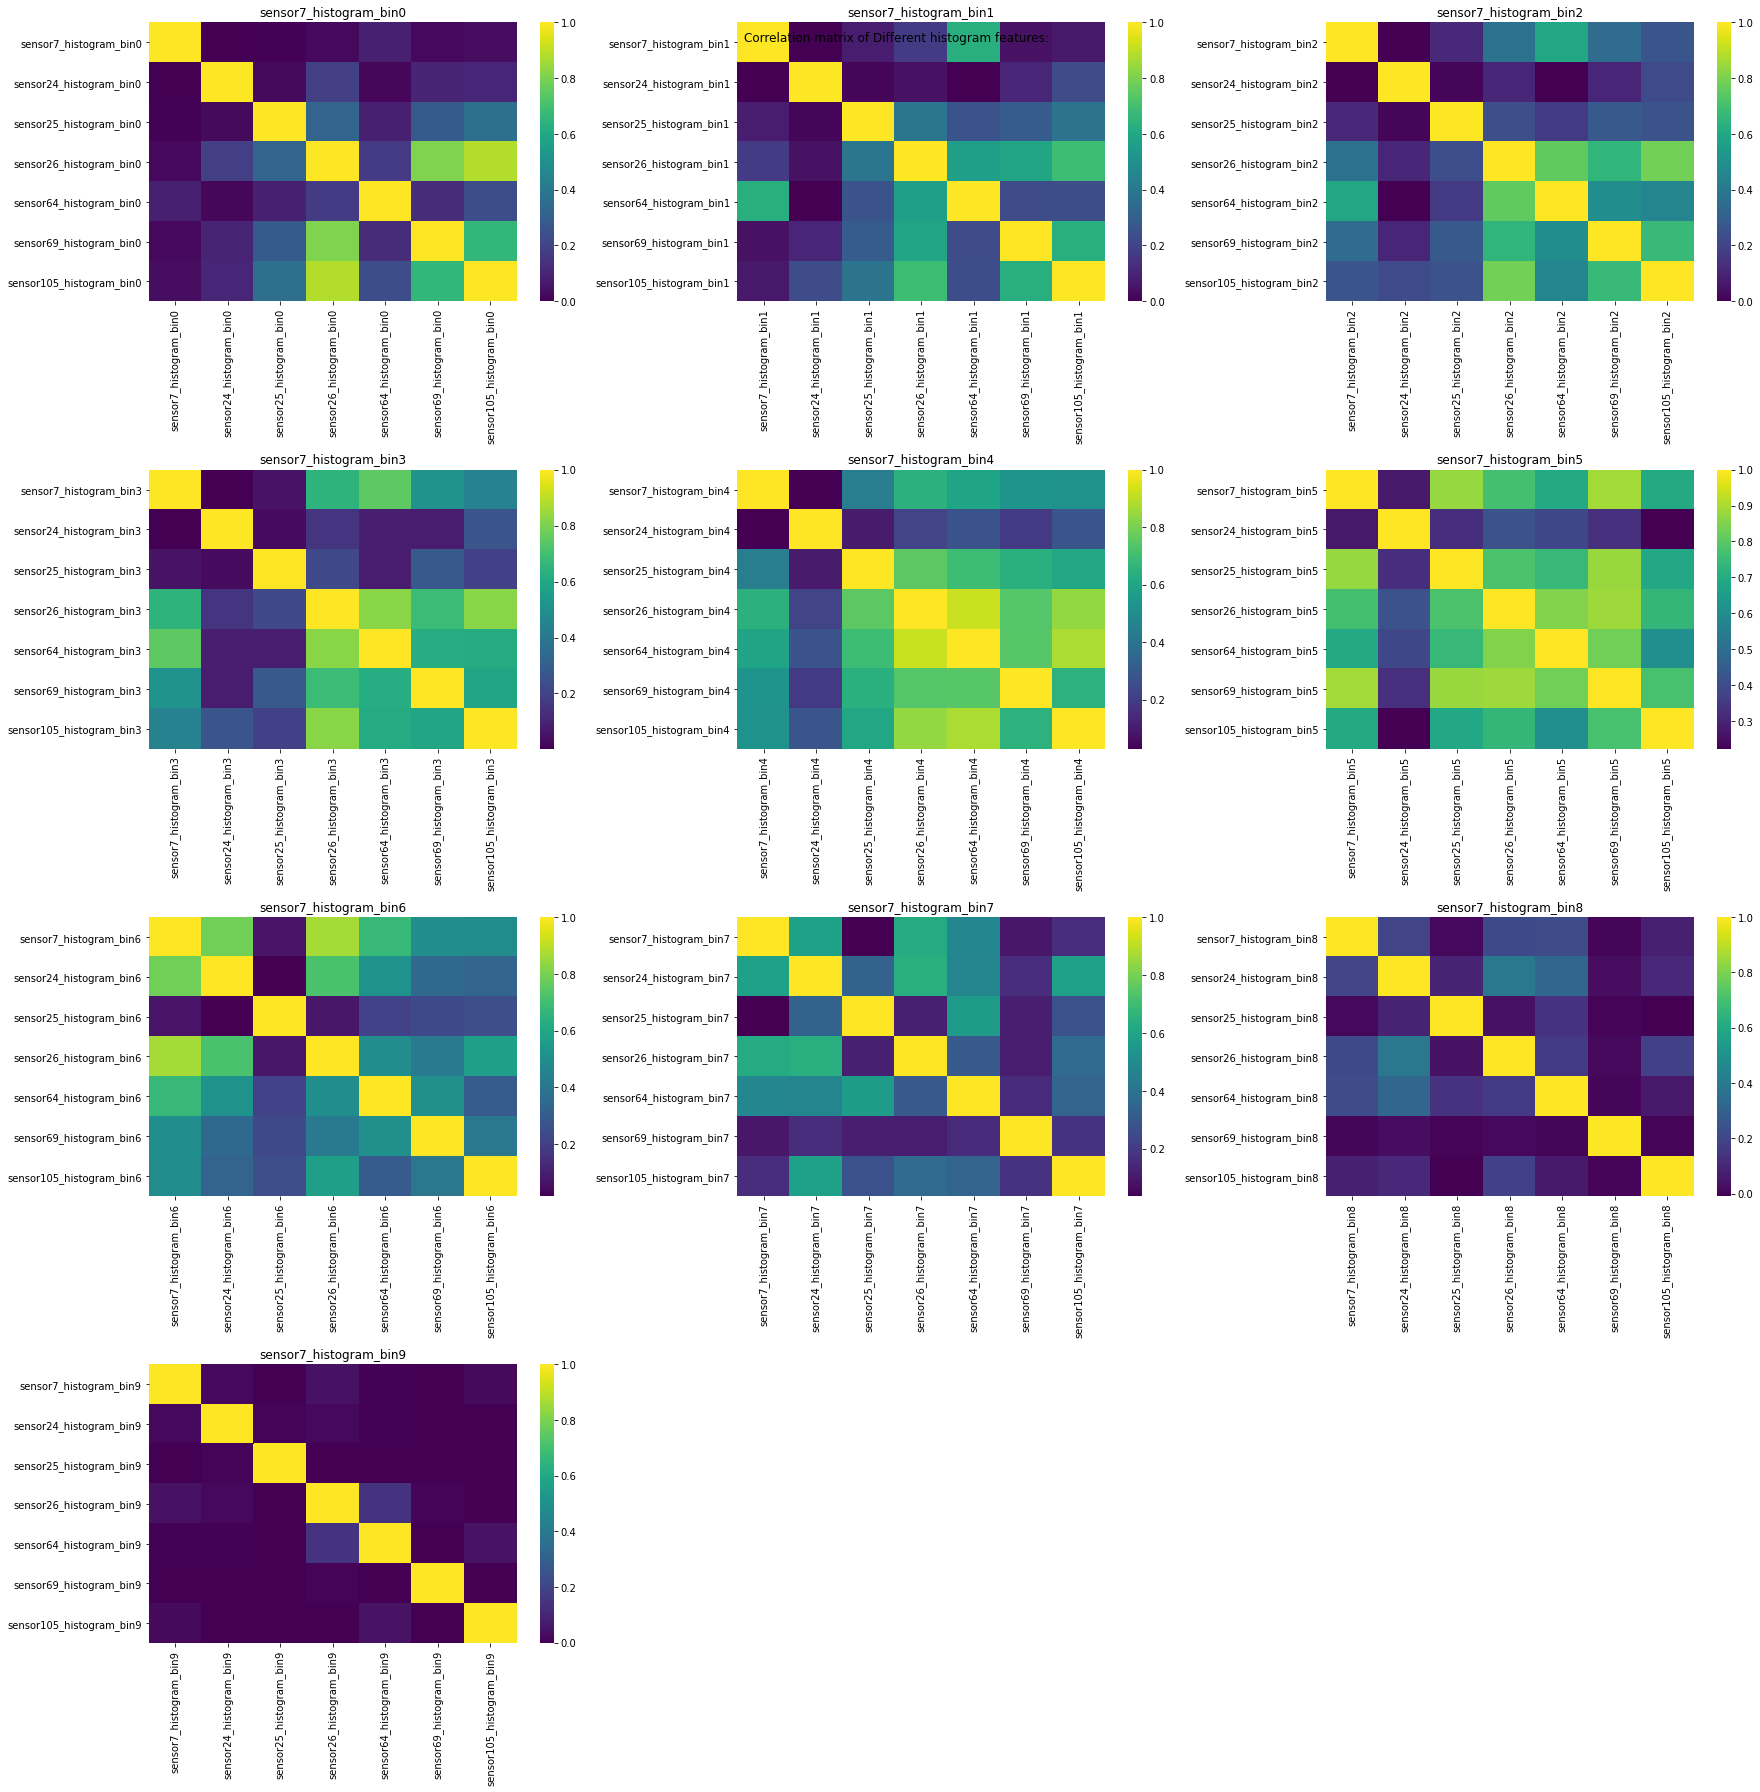

In [ ]:
#defining empty lists
hb0=[]
hb1=[]
hb2=[]
hb3=[]
hb4=[]
hb5=[]
hb6=[]
hb7=[]
hb8=[]
hb9=[]

# every bin is added to the list
for i in hist:
    if 'histogram_bin0' in i:
        hb0.append(i)
    if 'histogram_bin1' in i:
        hb1.append(i)
    if 'histogram_bin2' in i:
        hb2.append(i)
    if 'histogram_bin3' in i:
        hb3.append(i)
    if 'histogram_bin4' in i:
        hb4.append(i)
    if 'histogram_bin5' in i:
        hb5.append(i)
    if 'histogram_bin6' in i:
        hb6.append(i)
    if 'histogram_bin7' in i:
        hb7.append(i)
    if 'histogram_bin8' in i:
        hb8.append(i)
    if 'histogram_bin9' in i:
        hb9.append(i)

#plotting the heatmap
hb=[10,hb0,hb1,hb2,hb3,hb4,hb5,hb6,hb7,hb8,hb9]
#plotting the distributions
fig=plt.figure(figsize=(25,25))
columns = 3
rows = 4

for i in tqdm(range(1, 11)):
    fig.add_subplot(rows, columns, i)
    cor=train_data[hb[i]].corr()
    ax = sns.heatmap(cor, annot=False, cmap = 'viridis')
    plt.title(hb[i][0]) 
plt.suptitle('Correlation matrix of Different histogram features:',verticalalignment= 'top')
plt.tight_layout()
plt.show()

#### Observations : 
- Bins of all the features are not collinear.
- bin4 and bin5 are collinear for most of the histogram fetaures.
- bin9 is highly non-collinear for all the histogram features.

#4. Data Preprocessing/Cleaning

###4.1. Removing redundant and non-valuable columns/features
- Removing all those feature which have 75% of their datapoints values as Null 
- Removing those features which have same value for 95% of their datapoints.

In [ ]:
#extending lists of the features
red_feat.extend(null_feat)

#removing features
train_data= train_data.drop(red_feat,axis=1)

#checkint the shape of train_data 
print('Shape : ',train_data.shape)

train_data.head(2)

Shape :  (60000, 152)


,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor20_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin5,sensor25_histogram_bin6,...,sensor76_measure,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor107_measure
0,1.0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,...,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,2.0,0.0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,...,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0


- 20 redundant features were dropped from the dataset.

###4.2. Dropping Collinear features

In [ ]:
to_drop_col=list(set(to_drop_col) - set(red_feat))
#dropping heavily collinear features
train_data=train_data.drop(train_data[to_drop_col], axis=1)

In [ ]:
train_data.head()

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor9_measure,sensor10_measure,sensor12_measure,sensor18_measure,sensor20_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor36_measure,sensor44_measure,...,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor66_measure,sensor69_histogram_bin1,sensor69_histogram_bin4,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor74_measure,sensor76_measure,sensor77_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor90_measure,sensor92_measure,sensor93_measure,sensor96_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor107_measure
0,1.0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,1432864.0,3664156.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,2378.0,4.0,0.0,3574.0,0.0,0.0,0.0,10.0,108.0,50.0,330760.0,178540.0,...,98822.0,11208.0,1608.0,240.0,1226.0,428776.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,0.0,0.0,18.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85908.0,0.0,0.0,14745580.0,0.0,0.0,0.0,0.0,2801180.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,2.0,0.0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,653294.0,1720800.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,14726.0,6.0,0.0,229652.0,87082.0,4708.0,86.0,454.0,364.0,350.0,341420.0,6700.0,...,36294.0,5192.0,56.0,0.0,796.0,272956.0,301242.0,9148.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36946.0,0.0,0.0,4510080.0,0.0,0.0,0.0,0.0,3477820.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,3.0,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,370592.0,1883374.0,12016.0,0.0,0.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,34.0,0.0,0.0,81666.0,46.0,0.0,128.0,202.0,576.0,4.0,137160.0,28000.0,...,10260.0,2422.0,28.0,6.0,500.0,100326.0,488302.0,16682.0,246.0,0.0,230.0,292.0,2180528.0,22.0,0.0,0.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38182.0,0.0,0.0,300240.0,0.0,0.0,0.0,0.0,1040120.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,4.0,0.0,12.0,7.000000e+01,66.0,0.0,0.0,318.0,3232.0,1872.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0,60.0,6.0,0.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2398.0,1692.0,0.0,16.0,0.0,0.0,2.0,12.0,0.0,0.0,NaN,10580.0,...,0.0,0.0,0.0,2.0,6.0,692.0,388.0,0.0,0.0,0.0,138.0,8.0,1666.0,0.0,0.0,0.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,370.0,15740.0,20174.0,44.0,0.0,0.0,0.0,44.0,10.0,0.0,0.0,0.0,32.0
4,5.0,0.0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,1966618.0,1800340.0,4588.0,0.0,0.0,226.0,0.0,0.0,0.0,1788.0,642.0,372236.0,2128914.0,819596.0,584074.0,1644.0,362.0,562.0,842.0,30194.0,1606.0,0.0,0.0,470800.0,19292.0,0.0,448.0,556.0,642.0,2.0,306780.0,189000.0,...,10482.0,2776.0,86.0,212.0,520.0,186242.0,1137268.0,22228.0,204.0,0.0,1716.0,1664.0,3440288.0,0.0,0.0,0.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62648.0,0.0,0.0,457040.0,98334.0,27588.0,0.0,0.0,21173050.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0


###4.3. Handling NaN values 

In [ ]:
# we will be replacing the NaN values with a median of the column
for col in train_data.columns:
    if col not in ['id','target']:
        train_data[col] = train_data[col].fillna(train_data[col].median())

#####Why imputing with median?
- Many sensor values are small (close to 0) for majority of datapoints and few data points have very large values(in the ranges of 10^6), so imputing with mean will be not a good option.

In [ ]:
#to check if any null value is present in dataset
train_data.isna().sum().any()

False

In [ ]:
train_data.head(4)

,id,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor9_measure,sensor10_measure,sensor12_measure,sensor18_measure,sensor20_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor36_measure,sensor44_measure,...,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor66_measure,sensor69_histogram_bin1,sensor69_histogram_bin4,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor74_measure,sensor76_measure,sensor77_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor90_measure,sensor92_measure,sensor93_measure,sensor96_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor107_measure
0,1.0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,1432864.0,3664156.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,2378.0,4.0,0.0,3574.0,0.0,0.0,0.0,10.0,108.0,50.0,330760.0,178540.0,...,98822.0,11208.0,1608.0,240.0,1226.0,428776.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,0.0,0.0,18.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85908.0,0.0,0.0,14745580.0,0.0,0.0,0.0,0.0,2801180.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,2.0,0.0,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,653294.0,1720800.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,14726.0,6.0,0.0,229652.0,87082.0,4708.0,86.0,454.0,364.0,350.0,341420.0,6700.0,...,36294.0,5192.0,56.0,0.0,796.0,272956.0,301242.0,9148.0,22.0,0.0,210.0,278.0,1181117.0,0.0,0.0,0.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36946.0,0.0,0.0,4510080.0,0.0,0.0,0.0,0.0,3477820.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0
2,3.0,0.0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,370592.0,1883374.0,12016.0,0.0,0.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,870456.0,239798.0,1450312.0,1620.0,1156.0,1228.0,34250.0,1811606.0,34.0,0.0,0.0,81666.0,46.0,0.0,128.0,202.0,576.0,4.0,137160.0,28000.0,...,10260.0,2422.0,28.0,6.0,500.0,100326.0,488302.0,16682.0,246.0,0.0,230.0,292.0,2180528.0,22.0,0.0,0.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38182.0,0.0,0.0,300240.0,0.0,0.0,0.0,0.0,1040120.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0
3,4.0,0.0,12.0,7.000000e+01,66.0,0.0,0.0,318.0,3232.0,1872.0,0.0,0.0,0.0,0.0,642.0,0.0,0.0,60.0,6.0,0.0,0.0,2038.0,5596.0,64.0,6.0,6.0,914.0,76.0,2398.0,1692.0,0.0,16.0,0.0,0.0,2.0,12.0,0.0,0.0,210660.0,10580.0,...,0.0,0.0,0.0,2.0,6.0,692.0,388.0,0.0,0.0,0.0,138.0,8.0,1666.0,0.0,0.0,0.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,370.0,15740.0,20174.0,44.0,0.0,0.0,0.0,44.0,10.0,0.0,0.0,0.0,32.0


####4.4. Removing ID feature

In [ ]:
#dropping 'id' column from the dataset
train_data=train_data.drop(['id'],axis=1)

- 'Id' feature is not adding anything to the model.

##5. Feature Engineering/Crafting New Feature 

- We will add new features and will check whether these features help in classifying or not.

In [ ]:
l=len(train_data.columns)
train_data.head(2)

,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor9_measure,sensor10_measure,sensor12_measure,sensor18_measure,sensor20_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor36_measure,sensor44_measure,sensor50_measure,...,sensor64_histogram_bin7,sensor64_histogram_bin8,sensor64_histogram_bin9,sensor66_measure,sensor69_histogram_bin1,sensor69_histogram_bin4,sensor69_histogram_bin6,sensor69_histogram_bin7,sensor69_histogram_bin8,sensor69_histogram_bin9,sensor70_measure,sensor71_measure,sensor72_measure,sensor74_measure,sensor76_measure,sensor77_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor90_measure,sensor92_measure,sensor93_measure,sensor96_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor107_measure
0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,1432864.0,3664156.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,2378.0,4.0,0.0,3574.0,0.0,0.0,0.0,10.0,108.0,50.0,330760.0,178540.0,68656.0,...,98822.0,11208.0,1608.0,240.0,1226.0,428776.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,0.0,0.0,18.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85908.0,0.0,0.0,14745580.0,0.0,0.0,0.0,0.0,2801180.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0
1,0.0,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,653294.0,1720800.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,14726.0,6.0,0.0,229652.0,87082.0,4708.0,86.0,454.0,364.0,350.0,341420.0,6700.0,260120.0,...,36294.0,5192.0,56.0,0.0,796.0,272956.0,301242.0,9148.0,22.0,0.0,210.0,278.0,1181117.0,0.0,0.0,0.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36946.0,0.0,0.0,4510080.0,0.0,0.0,0.0,0.0,3477820.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0


- taking averages of every histogram feature across bins.

In [ ]:
new_hist=[]
for i in train_data.columns:
    if 'histogram_bin' in i:
        new_hist.append(i)

#seggregating th features
s_hist_7=new_hist[0:6]
s_hist_24=new_hist[6:10]
s_hist_25=new_hist[10:18]
s_hist_26=new_hist[18:21]
s_hist_64=new_hist[21:24]
s_hist_69=new_hist[24:30]
s_hist_105=new_hist[30:]

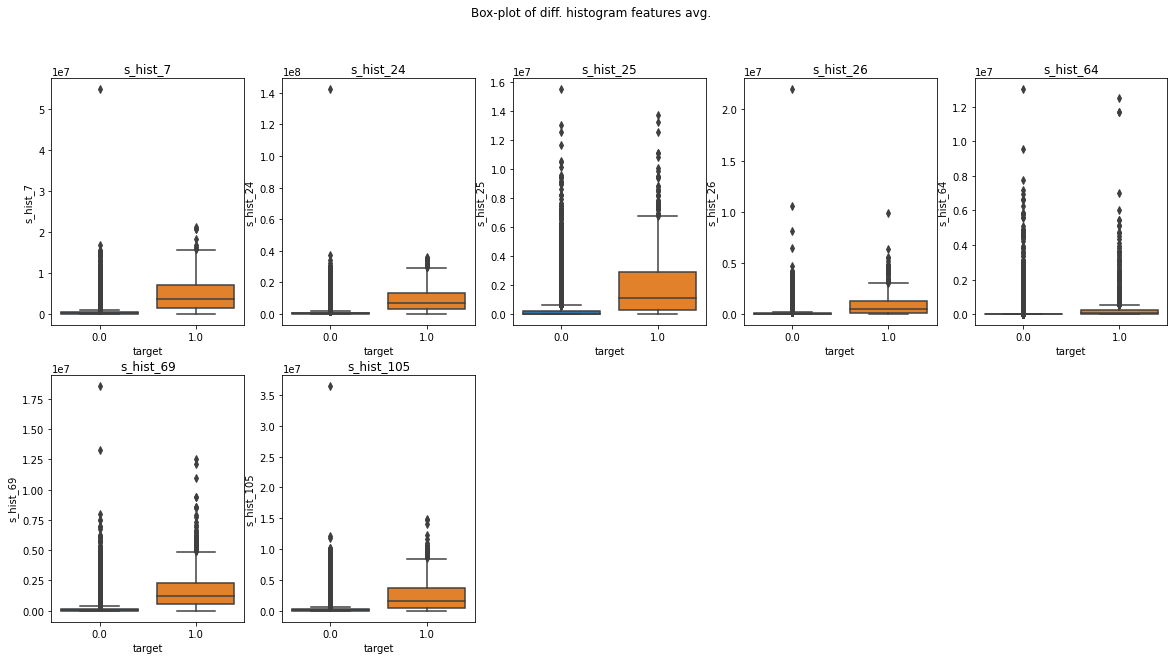

In [ ]:
#taking averages of every histogram feature.
all_hist=[s_hist_7,s_hist_24,s_hist_25,s_hist_26,s_hist_64,s_hist_69,s_hist_105]
all_hist_names=['s_hist_7','s_hist_24','s_hist_25','s_hist_26','s_hist_64','s_hist_69','s_hist_105']

for i in range(len(all_hist)):
    train_data[all_hist_names[i]]=train_data[all_hist[i]].mean(axis=1)

#plotting box_plots
fig=plt.figure(figsize=(20,10))
columns = 5
rows = 2
for i in range(1, 8):
    fig.add_subplot(rows, columns, i)
    ax = sns.boxplot(x='target', y=train_data[all_hist_names[i-1]], data=train_data)
    plt.title(all_hist_names[i-1]) 
plt.suptitle('Box-plot of diff. histogram features avg.')
#plt.tight_layout()
plt.show()

####5.1 Mean of a data point as feature

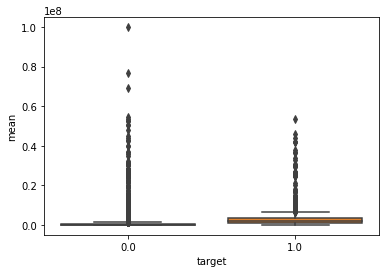

In [ ]:
train_data['mean']=train_data.iloc[:,1:l].mean(axis=1)
ax = sns.boxplot(x='target', y='mean', data=train_data)
plt.show()

- the IQR range for 0 and 1 class are apart.

####5.2 Std. Dev. of a data point as feature

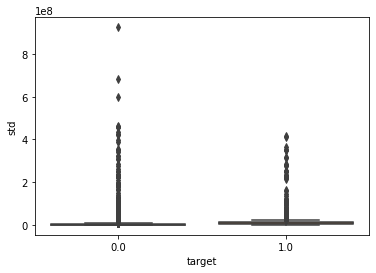

In [ ]:
train_data['std']=train_data.iloc[:,1:l].std(axis=1)
ax = sns.boxplot(x='target', y='std', data=train_data)
plt.show()

- IQR range is apart for both the classes but to a small extent.


####5.3.Max. value of a data point as feature

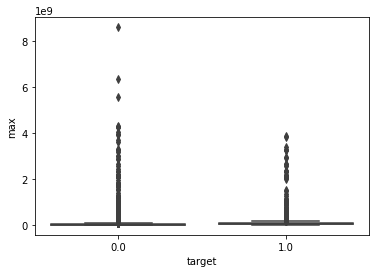

In [ ]:
train_data['max']=train_data.iloc[:,1:l].max(axis=1)
ax = sns.boxplot(x='target', y='max', data=train_data)
plt.show()

- IQR ranges overlap each other.


In [ ]:
train_data=train_data.drop(['max'],axis=1)

####5.4. Summation of a data point as feature

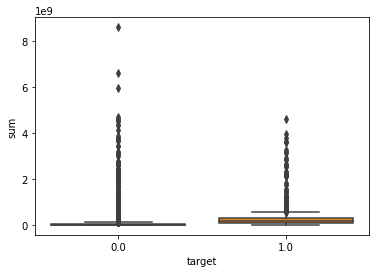

In [ ]:
train_data['sum']=train_data.iloc[:,1:l].sum(axis=1)
ax = sns.boxplot(x='target', y='sum', data=train_data)
plt.show()

- IQR range is apart for both the classes.


In [ ]:
train_data.head(2)

,target,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor9_measure,sensor10_measure,sensor12_measure,sensor18_measure,sensor20_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,sensor25_histogram_bin0,sensor25_histogram_bin1,sensor25_histogram_bin2,sensor25_histogram_bin3,sensor25_histogram_bin4,sensor25_histogram_bin6,sensor25_histogram_bin7,sensor25_histogram_bin8,sensor26_histogram_bin7,sensor26_histogram_bin8,sensor26_histogram_bin9,sensor28_measure,sensor29_measure,sensor30_measure,sensor31_measure,sensor36_measure,sensor44_measure,sensor50_measure,...,sensor70_measure,sensor71_measure,sensor72_measure,sensor74_measure,sensor76_measure,sensor77_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor90_measure,sensor92_measure,sensor93_measure,sensor96_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor107_measure,s_hist_7,s_hist_24,s_hist_25,s_hist_26,s_hist_64,s_hist_69,s_hist_105,mean,std,sum
0,0.0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,1432864.0,3664156.0,25896.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0,268.0,469014.0,4239660.0,703300.0,755876.0,5374.0,2108.0,4114.0,12348.0,615248.0,2378.0,4.0,0.0,3574.0,0.0,0.0,0.0,10.0,108.0,50.0,330760.0,178540.0,68656.0,...,532.0,734.0,4122704.0,0.0,0.0,18.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85908.0,0.0,0.0,14745580.0,0.0,0.0,0.0,0.0,2801180.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,853819.333333,1541962.5,80196.75,1191.333333,37212.666667,225281.666667,208025.6,2.520776e+07,2.297196e+08,2.167867e+09
1,0.0,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,653294.0,1720800.0,31642.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,7336.0,7808.0,13776.0,13086.0,1010074.0,14726.0,6.0,0.0,229652.0,87082.0,4708.0,86.0,454.0,364.0,350.0,341420.0,6700.0,260120.0,...,210.0,278.0,1181117.0,0.0,0.0,0.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36946.0,0.0,0.0,4510080.0,0.0,0.0,0.0,0.0,3477820.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,400956.000000,735178.5,133351.50,107147.333333,13847.333333,97360.666667,111857.2,2.080046e+05,6.829114e+05,1.788840e+07


####Saving the dataset to drive for further use.

In [ ]:
#saving the dataset 
train_data.to_csv('/content/drive/My Drive/Self Case study -1/final_data.csv')